In [2]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import scipy.stats
from sklearn.metrics import mean_squared_error
from math import sqrt
import os
from os import listdir
from datetime import datetime
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression

## MAIAC C6.1 vs AERONET

In [3]:
# linear regression
def linear_regression_plot_simple (path, date_format,nrows,ncols,color_maiac, plot, resolucion_espaciotemporal):
    '''
    The function allows plotting the linear regression of each AERONET station.
    In addition, the main statistics and the linear regression equation are shown.
    The data of each station of interest is contained in a folder in .csv format previously processed.
    This function goes through the folder and takes each of these files to later make the plot of interest.

    Variables:
    - path : path to the folder where the files in .csv format are located
    - date_format: format of the date column of the file of interest. 
    For example: date_format='%Y-%m-%d %H:%M:%S'
    - nrows: number of rows the plot will have
    - ncols: number of columnas the plot will have
    - color palette for each  for stations MAIAC-MODIS For example: 
    color_modis = ["#74c476","#fed976","#fb6a4a", "#74a9cf","#df65b0","#807dba"]
    color_maiac = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"]
    '''
    i=0 
    j=0 
    edge_color_maiac = color_maiac #["#004529", "#feb24c","#67000d","#081d58","#67001f","#4d004b"]
    # fig, ax = plt.subplots(ncols=ncols,nrows=nrows,  figsize=(14,8),dpi=500)
    fig, ax = plt.subplots(ncols=ncols,nrows=nrows,  figsize=(12,6),dpi=400)
    #fig.suptitle(resolucion_espaciotemporal, fontsize=16, fontweight='bold')
    #The folder where the files of each station are located is browsed.
    for p,files in enumerate(os.listdir(path)):
        print(p)
        N = len(os.listdir(path))
        data = pd.read_csv(os.path.join(path,files))
        #A column is created with the date called "Timestamp".
        #data["Timestamp"] = data["Date_MODIS"].apply(lambda x: datetime.strptime(x,date_format))
        data["Timestamp"] = data["date"].apply(lambda x: datetime.strptime(x,date_format))
        #data["Timestamp"] = data["date"].apply(lambda x: datetime.strptime(x,date_format))
        #Becomes the index column
        data.set_index('Timestamp', inplace = True)
        data_mean_period_len =len(data.dropna(how='all'))
        # Station Name
        station_name = files [2:4]
        ########################                VARIABLES                ########################
        
        
        #y_maiac= data["AOD_550_maiac"]
        y_maiac= data["AOD_550_maiac_mean"]
        x= data["AOD_550_AER_mean"]
        
        mask = ~np.isnan(x) & ~np.isnan(y_maiac)
        x= x[mask]
        y_maiac = y_maiac[mask]
        
        
        #numero de datos sin contar los NaNs
        n = len(x)
        #Calculo la pendiente, la ordenada al origen y el R2
        slope_maiac , intercept_maiac , r_maiac , p_maiac , stderr_maiac  = scipy.stats.linregress(x , y_maiac)
        

        # R2
       
                                                                                                               
        R2_maiac=r_maiac*r_maiac

        #Calculo RMSE
        #RMSE_modis = mean_squared_error(y_modis, x, squared = True)
        #RMSE_maiac = mean_squared_error(y_maiac, x, squared = True)
        
        RMSE_maiac = mean_squared_error(y_maiac, x, squared = False)
        
        bias_maiac = round(( sum(y_maiac - x)/n),2)
                
        ########################                PREDICT                ########################
            
       
        #y_maiac_p= data["AOD_550_maiac"].values.reshape(-1,1)
        y_maiac_p= data["AOD_550_maiac_mean"].values.reshape(-1,1)

        x_p= data["AOD_550_AER_mean"].values.reshape(-1,1)

        
        
        linear_regresion_maiac = LinearRegression()
        linear_regresion_maiac.fit(x_p,y_maiac_p)

        li_predict_maiac = linear_regresion_maiac.predict(x_p)
        #print(files)
        ########################                PLOT                ########################
        # Figure
        #Scatter plot Unit vs Ref
        #ax[i][j].scatter(x, y_maiac,  c=color_maiac[p] ,edgecolors=edge_color_maiac[p],alpha=0.5,  s=15,label="MAIAC")
        ax[i][j].scatter(x, y_maiac,  c=color_maiac[p] ,edgecolors=edge_color_maiac[p],alpha=0.3,  s=35, label="MAIAC")
        ax[i][j].plot(x_p,li_predict_maiac,c=color_maiac[p],linestyle="-",linewidth=3.5)
        
        #add the line 1:1
        ax[i][j].plot([0, 1.8], [0,1.8], color='black', linewidth=2.1, alpha=0.8, linestyle = '--')
        #Ticks
        ax[i][j].set_xlim(0, 1.8)
        ax[i][j].set_ylim(0, 1.8)
        ax[i][j].yaxis.set_ticks(np.arange(0.2, 1.85, 0.4))
        ax[i][j].xaxis.set_ticks(np.arange(0.2, 1.85, 0.4))
        
        ## Linear regression equation
        ax[i][j].text(0.05, 1.5, "MAIAC =", fontsize=14, ha="left", va="bottom",fontweight = "bold")
        ax[i][j].text(0.60, 1.5, (str(round (intercept_maiac,2)) + " + "+ str(round (slope_maiac,2))+ " AOD") , fontsize=15, ha="left", va="bottom")#, bbox=dict(boxstyle="round", fc=(1.0, 0.99, 0.99)))

        # Statistics by station
        
        ax[i][j].text(1.40, 0.68, "MAIAC" , fontsize=14, ha="center", va="bottom",fontweight = "bold")
        ax[i][j].text(1.10, 0.55, r'$R^{2}$ ', fontsize=15, ha="left", va="center")
        ax[i][j].text(1.10, 0.40, r'$RMSE$ ',fontsize=15,ha="left", va="center")
        ax[i][j].text(1.10, 0.25, r'$Bias$', fontsize=15,ha="left", va="center")
        ax[i][j].text(1.10, 0.1, r'$n$    ', fontsize=15,ha="left", va="center")

        # Statistics by station for  MAIAC
        ax[i][j].text(1.45, 0.55,(round(R2_maiac,2)) , fontsize=15, ha="left", va="center")
        ax[i][j].text(1.45, 0.40,   (round(RMSE_maiac,2)) , fontsize=15,ha="left", va="center")
        ax[i][j].text(1.45, 0.25,  bias_maiac, fontsize=15,ha="left", va="center")#,
        ax[i][j].text(1.45, 0.1,  n , fontsize=15,ha="left", va="center")
         
        # Title of each subplot corresponds to the name of the AERONET station.
        ax[i][j].set_title(station_name,fontsize=18,fontdict={'family': 'serif', 
            'color' : 'Black',
            'weight': 'bold',
            'size': 20})
         # Tittle legend
       # tittle_legend = ["MODIS","MAIAC"]
        #ax[i][j].legend(frameon = False, markerfirst = False, fontsize = 10,loc='upper right')
        # Axes names
        ax[i][j].set_xlabel(r'$AOD_{AERONET}$',size=18)
        ax[i][j].set_ylabel(r'$AOD_{MAIAC}$',size=18)
        
        
        
        ax[0][0].set_xlabel(r'',size=10)
        ax[0][1].set_xlabel(r'',size=10)
        ax[0][2].set_xlabel(r'',size=10)
        ax[1][0].set_xlabel(r'$AOD_{AERONET}$',size=18)
        ax[1][1].set_xlabel(r'$AOD_{AERONET}$',size=18)
        ax[1][2].set_xlabel(r'$AOD_{AERONET}$',size=18)
        
        
        ax[0][1].set_ylabel(r'$AOD_{MAIAC}$',size=18)
        ax[0][1].set_ylabel(r'',size=18)
        ax[0][2].set_ylabel(r'',size=18)
        ax[1][0].set_ylabel(r'$AOD_{MAIAC}$',size=18)
        ax[1][1].set_ylabel(r'',size=18)
        ax[1][2].set_ylabel(r'',size=18)
        
        
        ax[i][j].tick_params(axis='both', which='major', labelsize=14)
        # Configuration of subplots
        plt.subplots_adjust(left=0.01,#0.125,
                            bottom=0.01,#0.1, 
                            right=0.99,#0.9, 
                            top=0.99,#0.9, 
                            wspace=0.2, 
                            hspace=0.25)#0.4)
        # Location of data in each subplot
        ax[1][2].text(1.45, 0.55,("0.70") , fontsize=15, ha="left", va="center")
        ax[1][2].text(1.45, 0.25,  "-0.002", fontsize=15,ha="left", va="center")#
        #ax[0][0].text(0.50, 1.6, ("0.01 + 0.74 AOD") , fontsize=14, ha="left", va="bottom")
        #ax[1][0].text(0.50, 1.6, ("0.07 + 0.60 AOD") , fontsize=14, ha="left", va="bottom")#, bbox=dict(boxstyle="round", fc=(1.0, 0.99, 0.99)))

        #ax[1][2].text(1.50, 0.25, (round(bias_maiac,3)) , fontsize=15,ha="left", va="center")#,
        if j == ncols-1:
            i = i+1
            j = 0
        else:
            j = j+1
   # Save the plot to the current path
    if plot == 'save':
        return(plt.savefig("linear_regression_plot.jpg", dpi=500))
    else:
        return(plt.show())

### Latam

0
1
2
3
4
5


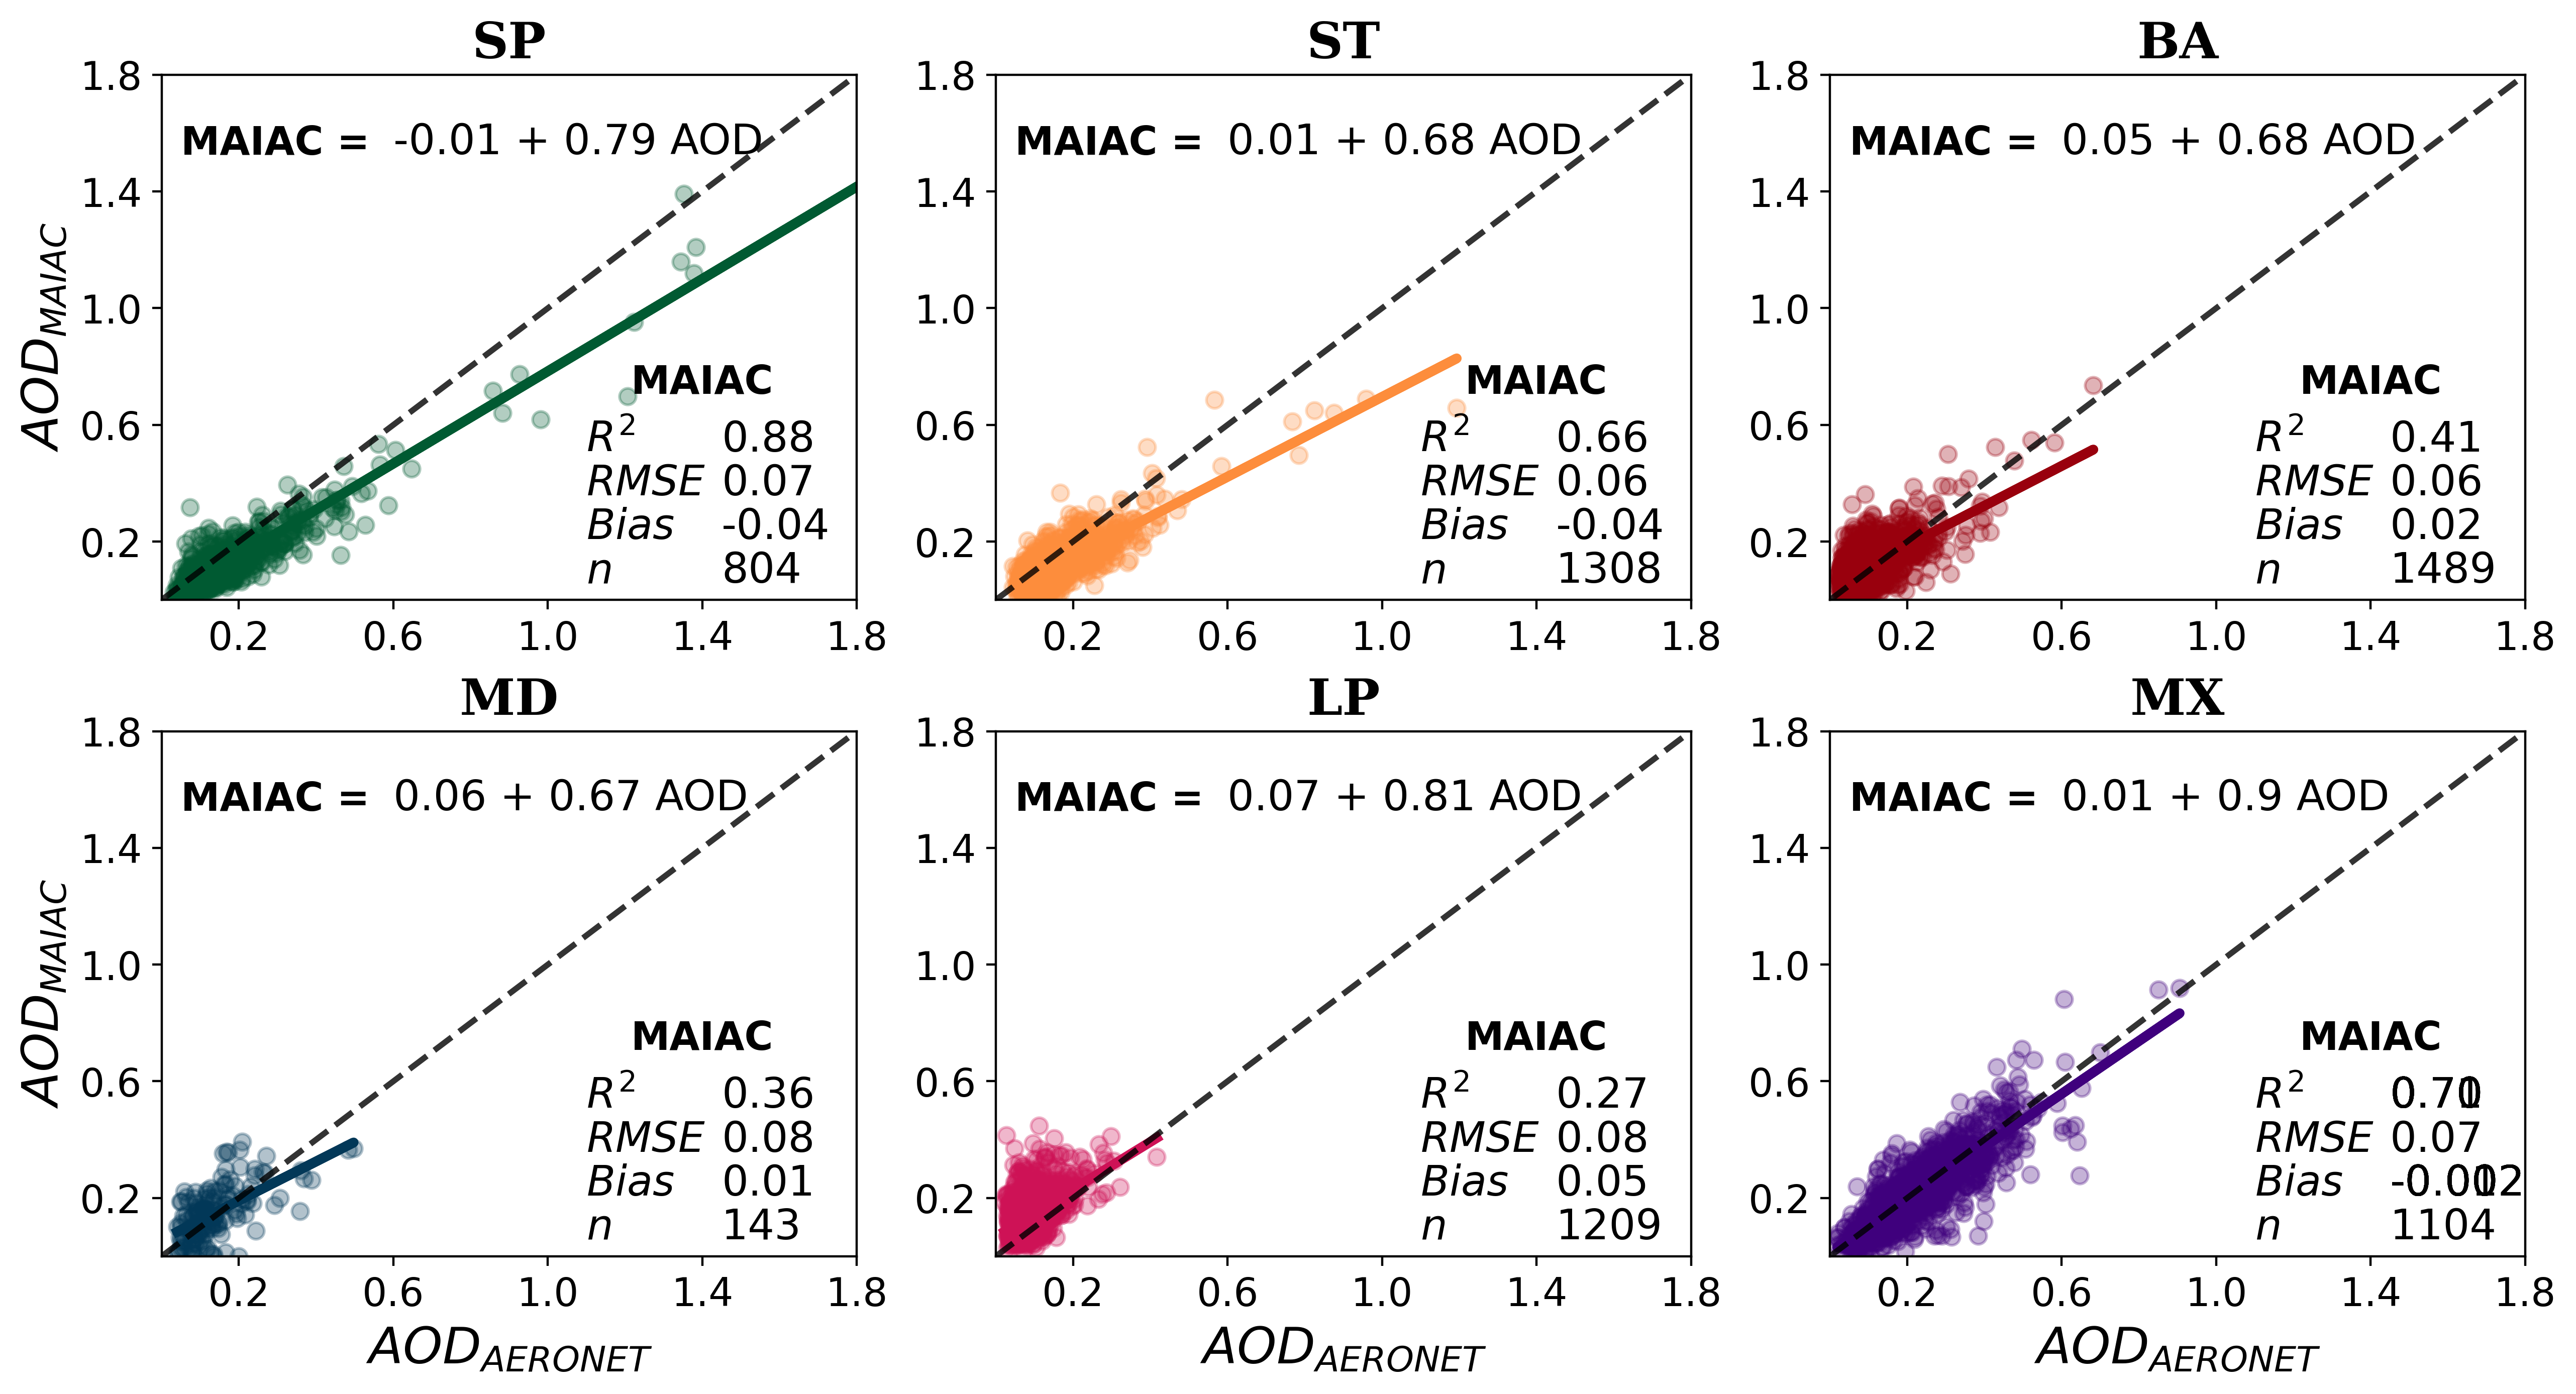

In [4]:

color_maiac = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"] # CHILE "#fd8d3c"
resolucion_espaciotemporal = "1KM-60MIN-TOT"
dire = "D:/Josefina/paper_git/paper_maiac/datasets/V03/processed/merge_AER-MAIAC/Latam_C61/dia/1km/60mins"
linear_regression_plot_simple (resolucion_espaciotemporal = resolucion_espaciotemporal, path=dire,date_format='%d/%m/%Y',nrows=2,ncols=3,color_maiac =color_maiac ,plot='LALAL')

### USA

In [ ]:
color_maiac = ["#2ca25f","#dd1c77","#2b8cbe","#756bb1","#fec44f" ,"#fc4e2a"]
resolucion_espaciotemporal = "1KM-60MIN-TOT"
dire = "D:/Josefina/paper_git/paper_maiac/datasets/V03/processed/merge_AER-MAIAC/Latam_C61/dia/1km/60mins"
linear_regression_plot_simple (resolucion_espaciotemporal = resolucion_espaciotemporal, path=dire,date_format='%d/%m/%Y',nrows=2,ncols=3,color_maiac =color_maiac ,plot='LALAL')

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde
from matplotlib.colors import Normalize

def linear_regression_plot_densidad(resolucion_espaciotemporal, path, date_format, nrows, ncols, color_maiac, plot):
    files = [f for f in os.listdir(path) if f.endswith('.csv')]
    files.sort()
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 4*nrows))
    axes = axes.flatten()
    
    # Crear un objeto Normalize para asegurar que la barra de colores esté entre 0 y 100
    norm = Normalize(vmin=0, vmax=100)

    for i, file in enumerate(files):
        if i >= len(axes):
            break
        
        df = pd.read_csv(os.path.join(path, file))
        df['date'] = pd.to_datetime(df['date'], format=date_format)
        df = df.sort_values(by='date')
        
        x = df["AOD_550_AER_mean"]
        y = df["AOD_550_maiac_mean"]
        
        # Calcular la densidad de puntos
        xy = np.vstack([x, y])
        z = gaussian_kde(xy)(xy)
        
        # Normalizar z para que esté en el rango de 0 a 100
#         z_normalized = np.clip(z, 0, 100)
        z_normalized = (z - z.min()) / (z.max() - z.min()) * 100
        ax = axes[i]
#         sc = ax.scatter(x, y, c=z_normalized, cmap='viridis', edgecolor='k', alpha=0.7, norm=norm)
        sc = ax.scatter(x, y, c=z_normalized, cmap='viridis',  alpha=0.8,  s=10)

        ax.plot([0, 1.8], [0,1.8], color='black', linewidth=2.1, alpha=0.8, linestyle = '--')
       

       
        ax.set_xlim([0, 1.8])
        ax.set_ylim([0, 1.8])
        ax.yaxis.set_ticks(np.arange(0.2, 1.85, 0.4))
        ax.xaxis.set_ticks(np.arange(0.2, 1.85, 0.4))
        ax.tick_params(axis='both', which='major', labelsize=14)
        ax.set_title(file[2:4],fontsize=18,fontdict={'family': 'serif', 
            'color' : 'Black',
            'weight': 'bold',
             'size': 24}) # ax.set_title(file)
        # Ajuste de regresión lineal
        slope, intercept = np.polyfit(x, y, 1)
#         sns.regplot(x=x, y=y, scatter=False, ax=ax, color='red', line_kws={'linewidth': 2})
        sns.regplot(x=x, y=y, scatter=False, ax=ax, color='red', line_kws={'linewidth': 2}, ci=None)

        # Mostrar pendiente y ordenada al origen
#         ax.text(0.5, 1.2, f'MAIC C6.1 = {intercept:.2f} + {slope:.2f} AOD', 
#                 fontsize=13, color='black', bbox=dict(facecolor='white', alpha=0.5), ha='right')

        n = len(x)
        r_squared = (np.corrcoef(x, y)[0, 1])* (np.corrcoef(x, y)[0, 1])
#         rmse = np.sqrt(np.mean((y - (slope * x + intercept))**2))
#         rmse = (np.mean((y - (slope * x + intercept))**2))
        rmse = mean_squared_error(y, x, squared = False)
        bias = round(( sum(y - x)/n),2)
        # Mostrar métricas estadísticas
#         ax.text(1.5, 0.1, f'MAIAC C6.1\n$R^{2}$: {r_squared:.2f}\nRMSE: {rmse:.2f}\nBias: {bias:.2f}\nN: {n:.0f}', 
#                 fontsize=13, color='black', bbox=dict(facecolor='white', alpha=0.5), ha='right')
#         ax.text(1.0, 0.15, 'MAIA C 6.1', fontsize=14, color='black', 
#                 bbox=dict(facecolor='white', alpha=0.5), ha='right', fontweight='bold')
#         ax.text(1.5, 0.1, f'$R^{2}$: {r_squared:.2f}\nRMSE: {rmse:.2f}\nBias: {bias:.2f}\nN: {n:.0f}', 
#                 fontsize=13, color='black', ha='right')

#         ax.text(1.0, 0.15, 'MAIA C 6.1', fontsize=14, color='black', ha='right', fontweight='bold')
        ax.annotate(f'MAIAC C6.1 = {intercept:.2f} + {slope:.2f} AOD',
            xy=(0.85, 0.88), xycoords='axes fraction',
            fontsize=15, color='black', ha='right')
        # Calcular métricas estadísticas
        ax.annotate(r'$\mathbf{MAIAC\ C6.1}$' + f'\n$R^{2}$: {r_squared:.2f}\nRMSE: {rmse:.2f}\nBias: {bias:.2f}\nN: {n:.0f}',
                    xy=(0.97, 0.05), xycoords='axes fraction', #(0.38, 0.53)
                    fontsize=15, color='black', bbox=dict(facecolor='white', alpha=0.5), ha='right')

        
        # Agregar la barra de color
        #cbar = fig.colorbar(sc, ax=ax)
#         cbar.set_label('Density')
#        ax.set_xlabel(r'$AOD_{AERONET}$',size=18)
#        ax.set_ylabel(r'$AOD_{MAIAC}$',size=18)


        ax.set_xlabel(r'$AOD_{AERONET}$',size=19)

        
        ax.set_ylabel(r'$AOD_{MAIAC}$',size=19)

        
        plt.subplots_adjust(left=0.08,#0.125,# Mueve los subplots más a la izquierda
                            bottom=0.01,#0.1, 
                            right=1.05,#0.9,  # Deja espacio para la barra de color
                            top=0.99,#0.9, 
                            wspace=0.01, 
                            hspace=0.01)#0.4)

    # Barra de color común para todos los subgráficos
#     fig.colorbar(sc, ax=axes, orientation='horizontal', fraction=0.02, pad=0.05)
    cbar = fig.colorbar(sc, ax=axes, orientation='vertical', fraction=0.05, pad=0.02)
    cbar.ax.tick_params(labelsize=19)
    plt.tight_layout()
    plt.show()


### Latam

<ipython-input-6-4a43837f9a74>:111: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


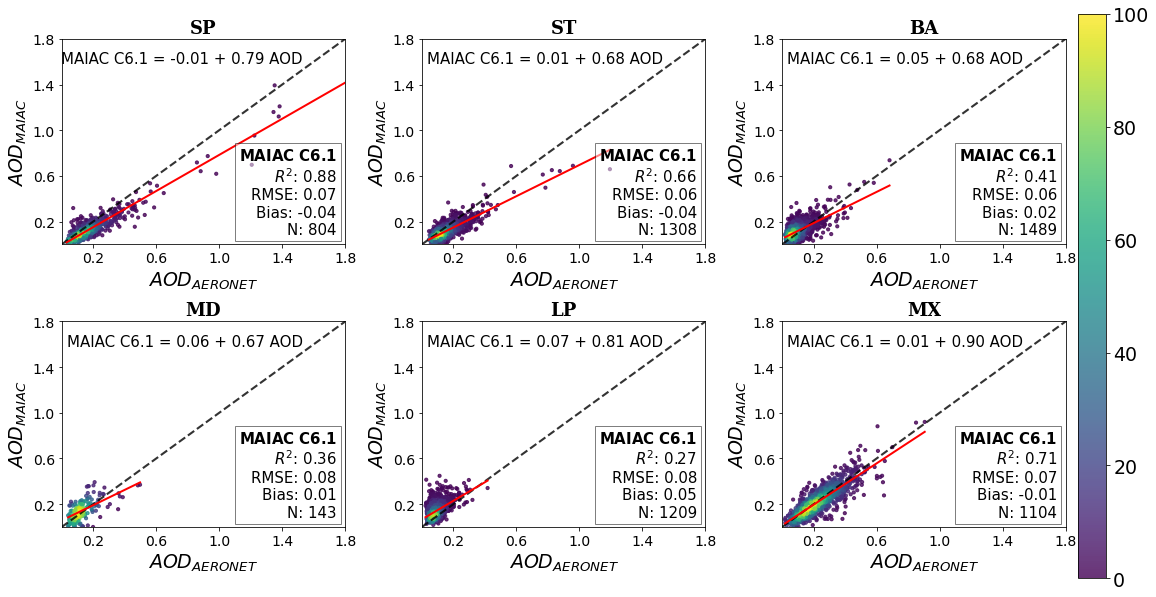

In [7]:
color_maiac = ["#005a32", "#fd8d3c", "#99000d", "#023858", "#ce1256", "#3f007d"]
resolucion_espaciotemporal = "1KM-60MIN-TOT"

dire = "D:/Josefina/paper_git/paper_maiac/datasets/V03/processed/merge_AER-MAIAC/Latam_C61/dia/1km/60mins"
linear_regression_plot_densidad(resolucion_espaciotemporal=resolucion_espaciotemporal,
                                path=dire, date_format='%d/%m/%Y', nrows=2, ncols=3, 
                                color_maiac=color_maiac, plot='LALAL')

### USA

<ipython-input-2-4a43837f9a74>:111: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


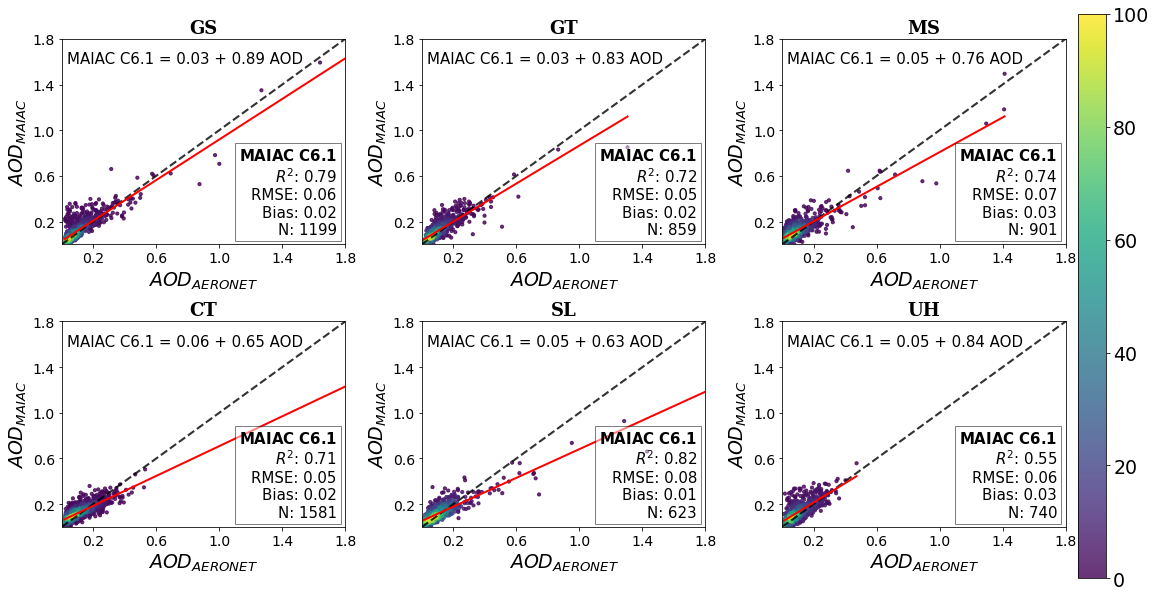

In [4]:
color_maiac = ["#2ca25f","#dd1c77","#2b8cbe","#756bb1","#fec44f" ,"#fc4e2a"]
resolucion_espaciotemporal = "1KM-60MIN-TOT"
dire = "D:/Josefina/paper_git/paper_maiac/datasets/V03/processed/merge_AER-MAIAC/USA_C61/dia/1km/60mins"
format_date='%Y-%m-%d'
linear_regression_plot_densidad (resolucion_espaciotemporal = resolucion_espaciotemporal, path=dire,date_format=format_date,nrows=2,ncols=3,color_maiac =color_maiac ,plot='LALAL')

##### REU Latam C6.1 1km - 60 mins

In [42]:
def REU_list(DF, Pollutant, Units, Lambda = 1, u_xi = 0.0):
    '''This function allows us to calculate the relative expanded uncertainty
    Variables:
    DF: It is a dataframe with the satellite AOD values (MAIAC and MODIS) and the AERONET reference AOD
    Pollutant: name of the reference pollutant, in our case AERONET
    Units: name of the variables we want to analyze. In our case MAIAC and MODIS
    '''
    
    #NOTE: Sigma_err_x (NILU notation) is the same as u_xi (GDE2010 notation)
    Sigma_err_x = u_xi
    # These are lists where I will save the different results
    list_u = []
    list_reu = []
    list_bias = []
    list_noise = []
    list_reux = []
    list_biasx = []
    list_noisex = []
    list_verificacion = []
  
    # The UNITS are covered, that is, the pollutant to be analyzed. In our case MAIAC and MODIS
    for Unit in Units:
        x = DF[Pollutant] #AERONET
        y = DF[Unit] # Pollutant
        
        #Masking the NaN's
        mask = ~np.isnan(x) & ~np.isnan(y)
        x = x[mask]
        y = y[mask]
        n = len(x)
        
        #Slope & Intercept usando REGRESION LINEAL (LR)
        slope, intercept, r, p, stderr = scipy.stats.linregress(x[mask], y[mask])
        b1 = slope
        b0 = intercept
        
        #Equation error variance for y = b0 + b1*x + v_i

        rss = (y - b0 - b1*x)**2
        RSS = rss.values.sum()
        Sigma_v_sqr = RSS/(n-2)
                
        #Error variance due to the deviation of the 1:1 line
        ec = (b0 + (b1 - 1)*x)**2
        ran = Sigma_v_sqr - Sigma_err_x**2
        
        #Results
        
        U = ((ran + ec)**(1/2))
        
        REU = ((2*100)/y)*U
        
        bias = ((((2*100)/y)**2)*ec)**(1/2)
        
        noise = ((((2*100)/y)**2)*ran)**(1/2)
        
        verificacion = ((bias**2 + noise**2)**(1/2))
        verificacion_u = ((bias**2 + noise**2)**(1/2))/((2*100)/y)
        
        REUx = 2*U*100/x
        
        biasx = ((((2*100)/x)**2)*ec)**(1/2)
        
        noisex = ((((2*100)/x)**2)*ran)**(1/2)
        
        #The results are each placed in a separate list
        list_u.append(U)
        list_reu.append(REU)
        list_bias.append(bias)
        list_noise.append(noise)
        list_verificacion.append(verificacion)
        list_reux.append(REUx)
        list_biasx.append(biasx)
        list_noisex.append(noisex)
    
    # The generated lists are concatenated
    U = pd.concat(list_u, axis=1)
    Col_Names=[]
    for i in Units:
        i = 'U_'+ i
        Col_Names.append(i)
    U.columns = Col_Names
    U.rename_axis("Timestamp", axis='index', inplace=True)
    
    REU = pd.concat(list_reu, axis=1)
    Col_Names=[]
    for i in Units:
        i = 'REU_'+ i
        Col_Names.append(i)
    REU.columns = Col_Names
    REU.rename_axis("Timestamp", axis='index', inplace=True)
    
    bias = pd.concat(list_bias, axis=1)
    Col_Names=[]
    for i in Units:
        i = 'b_'+ i
        Col_Names.append(i)
    bias.columns = Col_Names
    bias.rename_axis("Timestamp", axis='index', inplace=True)
    
    noise = pd.concat(list_noise, axis=1)
    Col_Names=[]
    for i in Units:
        i = 'n_'+ i
        Col_Names.append(i)
    noise.columns = Col_Names
    noise.rename_axis("Timestamp", axis='index', inplace=True)
    
    verificacion = pd.concat(list_verificacion, axis =1 )
    Col_Names=[]
    for i in Units:
        i = 'verificacion_'+ i
        Col_Names.append(i)
    verificacion.columns = Col_Names
    verificacion.rename_axis("Timestamp", axis='index', inplace=True)
    
    REUx = pd.concat(list_reux, axis=1)
    Col_Names=[]
    for i in Units:
        i = 'REUx_'+ i
        Col_Names.append(i)
    REUx.columns = Col_Names
    REUx.rename_axis("Timestamp", axis='index', inplace=True)
    
    biasx = pd.concat(list_biasx, axis=1)
    Col_Names=[]
    for i in Units:
        i = 'bx_'+ i
        Col_Names.append(i)
    biasx.columns = Col_Names
    biasx.rename_axis("Timestamp", axis='index', inplace=True)
    
    noisex = pd.concat(list_noisex, axis=1)
    Col_Names=[]
    for i in Units:
        i = 'nx_'+ i
        Col_Names.append(i)
    noisex.columns = Col_Names
    noisex.rename_axis("Timestamp", axis='index', inplace=True)
    
   
    REUyx = pd.concat((DF[Pollutant], U, REU, bias, noise, REUx, biasx, noisex,verificacion), axis=1)#, 

    
    return REUyx
# REU PLOT
def REU_plot(path, date_format,nrows,ncols,color_maiac,plot,resolucion_espaciotemporal):
    '''
    This function allows plotting the previously calculated REU. 
    The data of each station of interest is contained in a folder in .csv format previously processed.
    This function goes through the folder and takes each of these files to later make the plot of interest.

    Variables:
    - path : path to the folder where the files in .csv format are located
    - date_format: format of the date column of the file of interest. 
    For example: date_format='%Y-%m-%d %H:%M:%S'
    - nrows: number of rows the plot will have
    - ncols: number of columnas the plot will have
    - color palette for each  for stations MAIAC-MODIS For example: 
    color_modis = ["#74c476","#fed976","#fb6a4a", "#74a9cf","#df65b0","#807dba"]
    color_maiac = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"]
    '''
    i=0 
    j=0 
    edge_color_maiac = ["#004529", "#feb24c","#67000d","#081d58","#67001f","#4d004b"]
    edge_color_modis = ["#41ab5d","#feb24c","#cb181d","#045a8d","#ce1256","#810f7c"]
    listas_medias = [0.19,0.16,0.11,0.2,0.1,0.29]
    sp_media = 0.19
    st_media = 0.16
    ba_media = 0.11
    md_media = 0.2
    lp_media = 0.1
    mx_media = 0.29
    

        
    fig, ax = plt.subplots(ncols=ncols,nrows=nrows,  figsize=(14,6),dpi=500)
    #The folder where the files of each station are located is browsed.
    #fig.suptitle(resolucion_espaciotemporal, fontsize=16, fontweight='bold')
    for p,files in enumerate(os.listdir(path)):
        N = len(os.listdir(path))
        data = pd.read_csv(os.path.join(path,files))
        #A column is created with the date called "Timestamp".
        #data["Timestamp"] = data["Date_MODIS"].apply(lambda x: datetime.strptime(x,date_format))
        data["Timestamp"] = data["date"].apply(lambda x: datetime.strptime(x,date_format))
        #Becomes the index column
        data.set_index('Timestamp', inplace = True)
        data_mean_period_len =len(data.dropna(how='all'))
        

        df_REUxy = REU_list(DF = data, Pollutant = 'AOD_550_AER_mean', 
        Units = ["AOD_550_maiac_mean"], 
        #Units = ["AOD_550_maiac"], 
        Lambda = 1, u_xi = 0.0)
        # Station Name
        station_name = files [2:4]
        ########################                VARIABLES                ########################
        
        
        x = df_REUxy["AOD_550_AER_mean"]
        #y_maiac = df_REUxy["REUx_AOD_550_maiac"]
        y_maiac = df_REUxy["REUx_AOD_550_maiac_mean"]
        n = len(x)
#         min_maiac = round(min(df_REUxy["REUx_AOD_550_maiac"]),2)
#         max_maiac = round(max(df_REUxy["REUx_AOD_550_maiac"]),2)
        min_maiac = round(min(df_REUxy["REUx_AOD_550_maiac_mean"]),2)
        max_maiac = round(max(df_REUxy["REUx_AOD_550_maiac_mean"]),2)

        ########################                PLOT                ########################


        x_intersec = listas_medias[p] #0.18
    # Encontrar el índice más cercano a x=0.19
        idx = (x - x_intersec).abs().idxmin()
        y_intersec = y_maiac.loc[idx]

        ax[i][j].hlines(y=y_intersec, xmin=0, xmax=1.2, color='black', linewidth=1.5, linestyle=':', alpha=0.8)
        ax[i][j].text(0.5, y_intersec + 5, f"REU = {y_intersec:.0f}%", color='black', fontsize=12)


        # Figure
        #Scatter plot REU vs Ref
        ax[i][j].scatter(x, y_maiac, s=10, color=color_maiac[p], alpha=0.5, linewidth=1) # Color
        ax[i][j].grid(color = 'grey', linestyle = '--', linewidth = 0.2)
        #ax[i][j].hlines(y=0.19, xmin=0, xmax=1.2, color='red', linewidth=1.2, alpha=0.8, linestyle=':')

       # The line with the minimum value of MIAC and MODIS is added
#         ax[i][j].hlines(y=min_maiac , xmin=0, xmax=1.2, color='black', linewidth=1, alpha=0.8, linestyle = '--')
        
        ax[0][0].vlines(x= sp_media, ymin=0, ymax=300, color=color_maiac[0], linewidth=1, alpha=0.8, linestyle = '-')
        ax[0][1].vlines(x= st_media, ymin=0, ymax=300, color=color_maiac[1], linewidth=1, alpha=0.8, linestyle = '-')
        ax[0][2].vlines(x= ba_media, ymin=0, ymax=300, color=color_maiac[2], linewidth=1, alpha=0.8, linestyle = '-')
        ax[1][0].vlines(x= md_media, ymin=0, ymax=300, color=color_maiac[3], linewidth=1, alpha=0.8, linestyle = '-')
        ax[1][1].vlines(x= lp_media, ymin=0, ymax=300, color=color_maiac[4], linewidth=1, alpha=0.8, linestyle = '-')
        ax[1][2].vlines(x= mx_media, ymin=0, ymax=300, color=color_maiac[5], linewidth=1, alpha=0.8, linestyle = '-')
        ax[0][0].text(sp_media-0.07, 180, "$AER_{media}$ = 0.19", rotation=90, va='center',size=12)
        ax[0][1].text(st_media-0.07, 180, "$AER_{media}$ = 0.16", rotation=90, va='center',size=12)
        ax[0][2].text(ba_media-0.07, 180, "$AER_{media}$ = 0.11", rotation=90, va='center',size=12)
        ax[1][0].text(md_media-0.07, 180, "$AER_{media}$ = 0.20", rotation=90, va='center',size=12)
        ax[1][1].text(lp_media-0.07, 150, "$AER_{media}$ = 0.10", rotation=90, va='center',size=12)
        ax[1][2].text(mx_media-0.07, 180, "$AER_{media}$ = 0.29", rotation=90, va='center',size=12)
#     sp_media = 0.18
#     st_media = 0.16
#     ba_media = 0.11
#     md_media = 0.2
#     lp_media = 0.08
#     mx_media = 0.29
#         ax[0][0].vlines(x= gs_media, ymin=0, ymax=300, color=color_maiac[0], linewidth=1, alpha=0.8, linestyle = '-')
#         ax[0][1].vlines(x= gt_media, ymin=0, ymax=300, color=color_maiac[1], linewidth=1, alpha=0.8, linestyle = '-')
#         ax[0][2].vlines(x= ms_media, ymin=0, ymax=300, color=color_maiac[2], linewidth=1, alpha=0.8, linestyle = '-')
#         ax[1][0].vlines(x= ct_media, ymin=0, ymax=300, color=color_maiac[3], linewidth=1, alpha=0.8, linestyle = '-')
#         ax[1][1].vlines(x= sl_media, ymin=0, ymax=300, color=color_maiac[4], linewidth=1, alpha=0.8, linestyle = '-')
#         ax[1][2].vlines(x= uh_media, ymin=0, ymax=300, color=color_maiac[5], linewidth=1, alpha=0.8, linestyle = '-')
#         ax[0][0].text(gs_media-0.05, 150, "AER mean", rotation=90, va='center',size=9)
#         ax[0][1].text(gt_media-0.05, 150, "AER mean", rotation=90, va='center',size=9)
#         ax[0][2].text(ms_media-0.05, 150, "AER mean", rotation=90, va='center',size=9)
#         ax[1][0].text(ct_media-0.05, 150, "AER mean", rotation=90, va='center',size=9)
#         ax[1][1].text(sl_media-0.05, 150, "AER mean", rotation=90, va='center',size=9)
#         ax[1][2].text(uh_media-0.05, 150, "AER mean", rotation=90, va='center',size=9)
        
#         ax[i][j].text(0.8, min_maiac+5,(f'$REU = {min_maiac}$'),
#                       ha="left", va="center",fontdict={'family': 'serif', 
#                      'color' : 'Black',
#                      'weight': 'bold',
#                      'size': 9})

        # Title of each subplot corresponds toY the name of the AERONET station.
        ax[i][j].set_title(station_name,fontsize=15,fontdict={'family': 'serif', 
            'color' : 'Black',
            'weight': 'bold',
            'size': 20})
        # X axis limit
        ax[i][j].set_xlim(0,1.2) 
        # Y axis limit
        ax[i][j].set_ylim(0,300)
        
#         ax[i][j].set_yticks(range(0, 301, 20))
        # Axes names
        ax[i][j].set_xlabel(r'$AOD_{AERONET}$',size=10)
        ax[i][j].set_ylabel(r'REU $AOD_{Satelital}$',size=10)
        # Configuration of subplots
        plt.subplots_adjust(left=0.125,bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.4)
        # Tittle legend
        tittle_legend = ["MAIAC"]
        ax[i][j].legend(frameon = False, markerfirst = False, fontsize = 10)
        ax[i][j].grid(False)
        # Location of data in each subplot
        if j == ncols-1:
            i = i+1
            j = 0
        else:
            j = j+1
    
       # Save the plot to the current path
    if plot == 'save':
        return(plt.savefig("REU_plot.jpg", dpi=500))
    else:
        return(plt.show())
    
dir = "D:/Josefina/paper_git/paper_maiac/datasets/V03/processed/merge_AER-MAIAC/Latam_C61/dia/1km/60mins"
resolucion_espaciotemporal = "1KM-60MIN-TOT"
REU_plot(path=dir,date_format='%d/%m/%Y',nrows=2,ncols=3,color_maiac = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"],plot = 'LALAL',resolucion_espaciotemporal=resolucion_espaciotemporal)


## REU USA

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


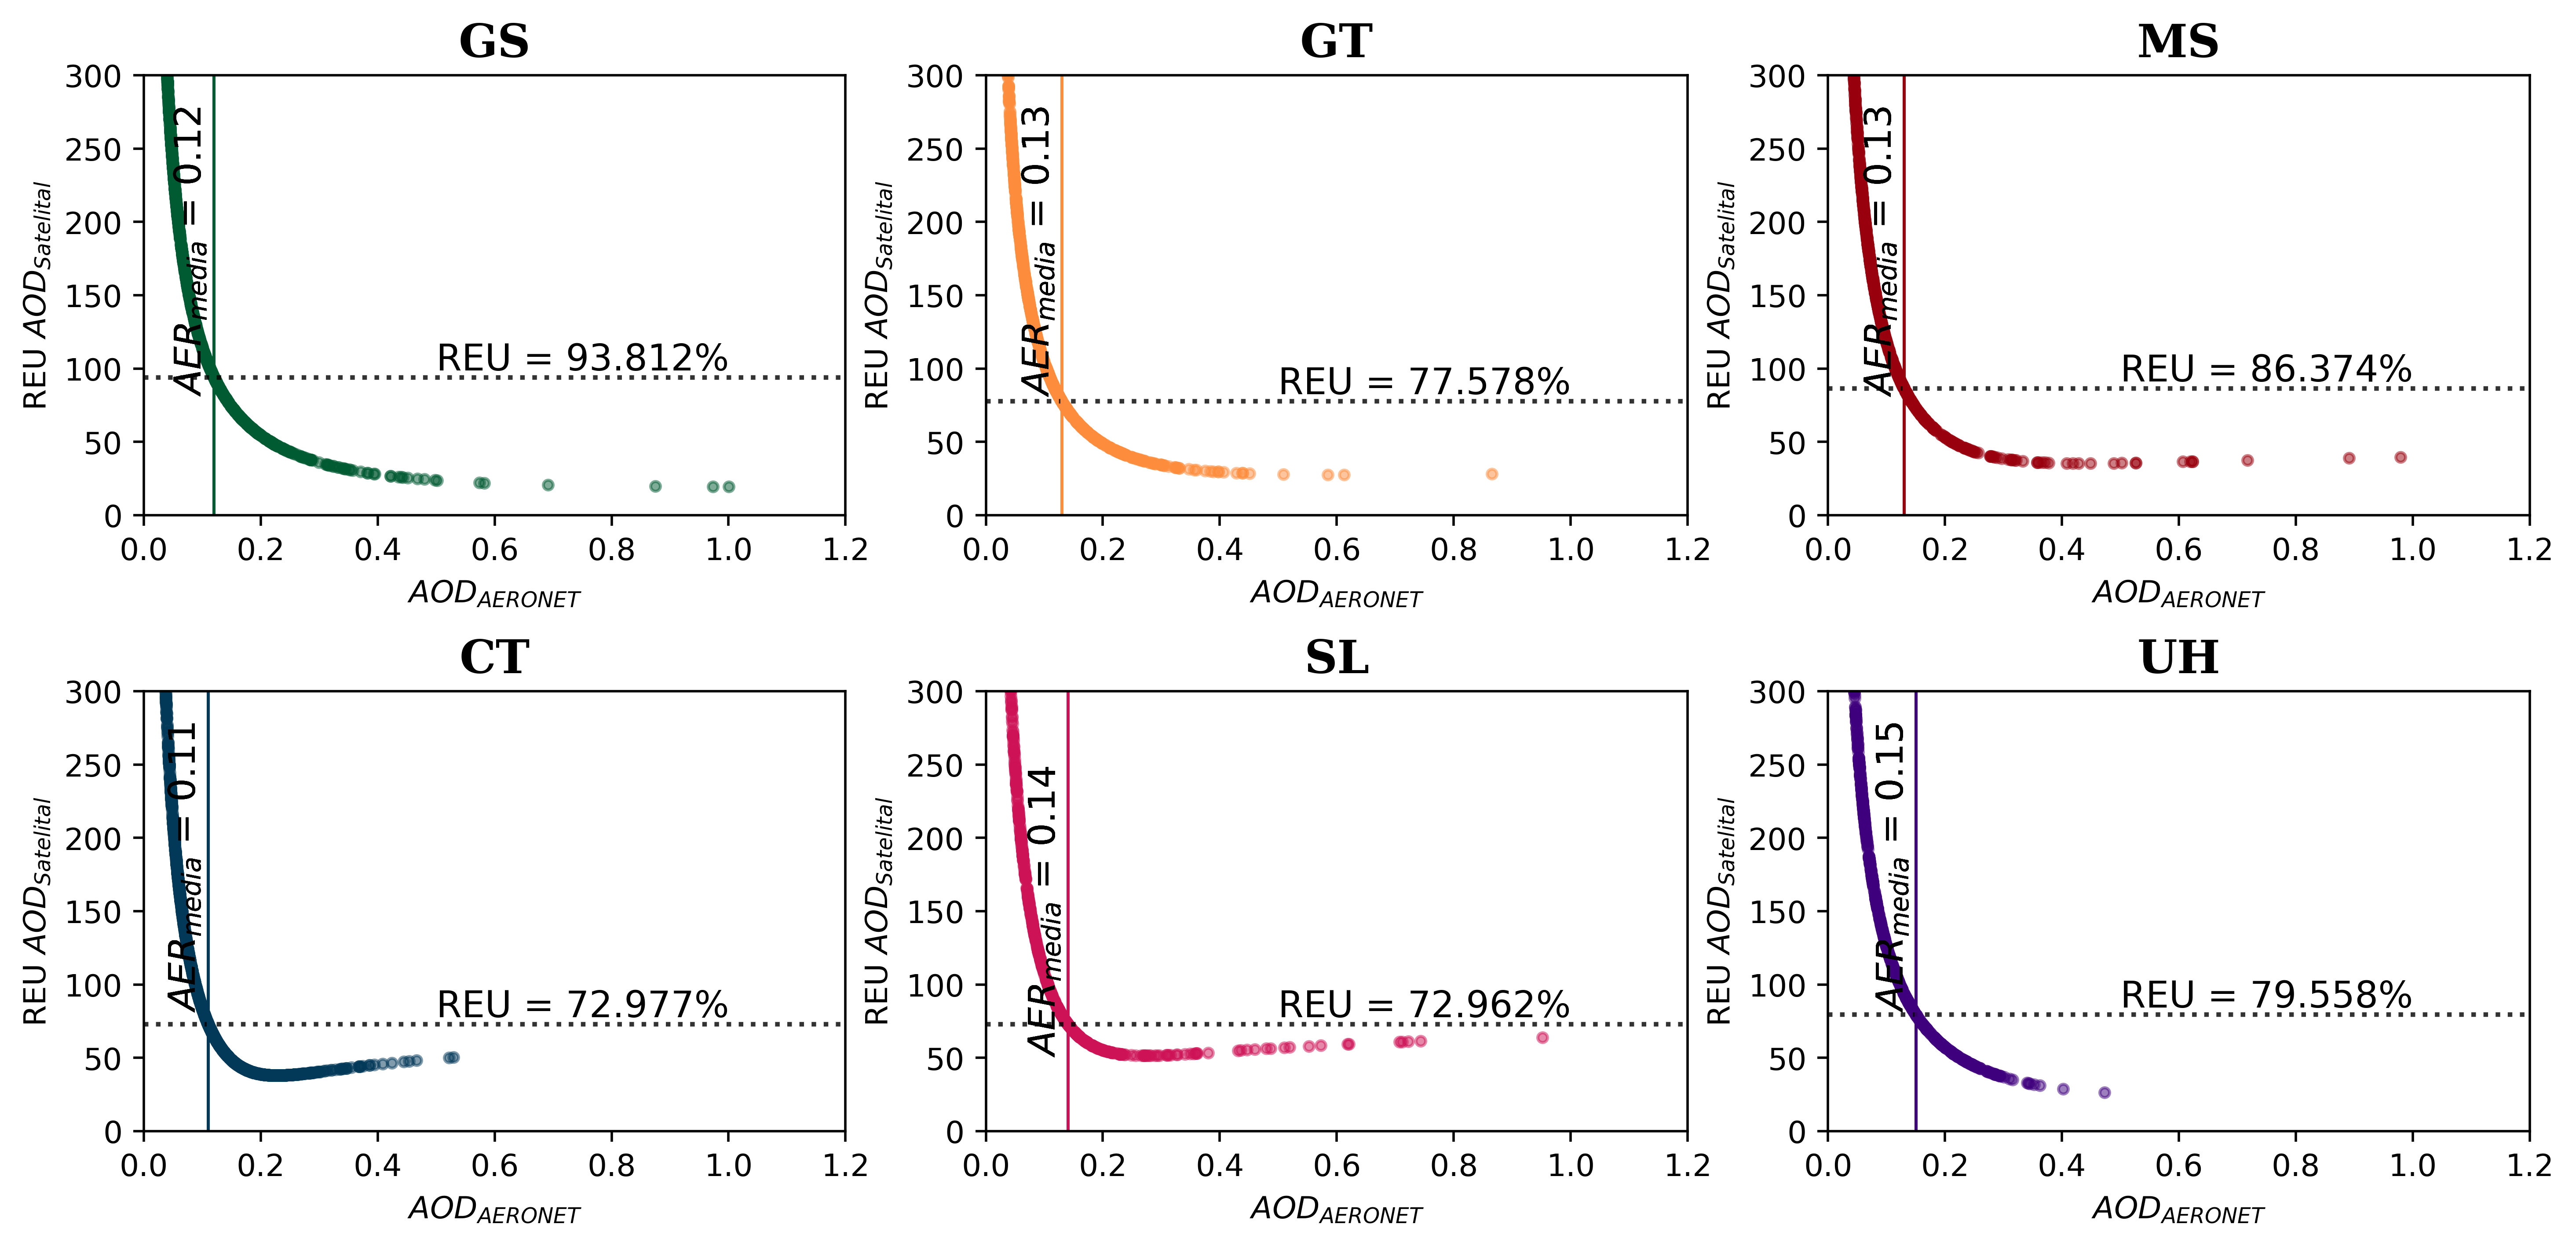

In [121]:
def REU_list(DF, Pollutant, Units, Lambda = 1, u_xi = 0.0):
    '''This function allows us to calculate the relative expanded uncertainty
    Variables:
    DF: It is a dataframe with the satellite AOD values (MAIAC and MODIS) and the AERONET reference AOD
    Pollutant: name of the reference pollutant, in our case AERONET
    Units: name of the variables we want to analyze. In our case MAIAC and MODIS
    '''
    
    #NOTE: Sigma_err_x (NILU notation) is the same as u_xi (GDE2010 notation)
    Sigma_err_x = u_xi
    # These are lists where I will save the different results
    list_u = []
    list_reu = []
    list_bias = []
    list_noise = []
    list_reux = []
    list_biasx = []
    list_noisex = []
    list_verificacion = []
  
    # The UNITS are covered, that is, the pollutant to be analyzed. In our case MAIAC and MODIS
    for Unit in Units:
        x = DF[Pollutant] #AERONET
        y = DF[Unit] # Pollutant
        
        #Masking the NaN's
        mask = ~np.isnan(x) & ~np.isnan(y)
        x = x[mask]
        y = y[mask]
        n = len(x)
        
        #Slope & Intercept usando REGRESION LINEAL (LR)
        slope, intercept, r, p, stderr = scipy.stats.linregress(x[mask], y[mask])
        b1 = slope
        b0 = intercept
        
        #Equation error variance for y = b0 + b1*x + v_i

        rss = (y - b0 - b1*x)**2
        RSS = rss.values.sum()
        Sigma_v_sqr = RSS/(n-2)
                
        #Error variance due to the deviation of the 1:1 line
        ec = (b0 + (b1 - 1)*x)**2
        ran = Sigma_v_sqr - Sigma_err_x**2
        
        #Results
        
        U = ((ran + ec)**(1/2))
        
        REU = ((2*100)/y)*U
        
        bias = ((((2*100)/y)**2)*ec)**(1/2)
        
        noise = ((((2*100)/y)**2)*ran)**(1/2)
        
        verificacion = ((bias**2 + noise**2)**(1/2))
        verificacion_u = ((bias**2 + noise**2)**(1/2))/((2*100)/y)
        
        REUx = 2*U*100/x
        
        biasx = ((((2*100)/x)**2)*ec)**(1/2)
        
        noisex = ((((2*100)/x)**2)*ran)**(1/2)
        
        #The results are each placed in a separate list
        list_u.append(U)
        list_reu.append(REU)
        list_bias.append(bias)
        list_noise.append(noise)
        list_verificacion.append(verificacion)
        list_reux.append(REUx)
        list_biasx.append(biasx)
        list_noisex.append(noisex)
    
    # The generated lists are concatenated
    U = pd.concat(list_u, axis=1)
    Col_Names=[]
    for i in Units:
        i = 'U_'+ i
        Col_Names.append(i)
    U.columns = Col_Names
    U.rename_axis("Timestamp", axis='index', inplace=True)
    
    REU = pd.concat(list_reu, axis=1)
    Col_Names=[]
    for i in Units:
        i = 'REU_'+ i
        Col_Names.append(i)
    REU.columns = Col_Names
    REU.rename_axis("Timestamp", axis='index', inplace=True)
    
    bias = pd.concat(list_bias, axis=1)
    Col_Names=[]
    for i in Units:
        i = 'b_'+ i
        Col_Names.append(i)
    bias.columns = Col_Names
    bias.rename_axis("Timestamp", axis='index', inplace=True)
    
    noise = pd.concat(list_noise, axis=1)
    Col_Names=[]
    for i in Units:
        i = 'n_'+ i
        Col_Names.append(i)
    noise.columns = Col_Names
    noise.rename_axis("Timestamp", axis='index', inplace=True)
    
    verificacion = pd.concat(list_verificacion, axis =1 )
    Col_Names=[]
    for i in Units:
        i = 'verificacion_'+ i
        Col_Names.append(i)
    verificacion.columns = Col_Names
    verificacion.rename_axis("Timestamp", axis='index', inplace=True)
    
    REUx = pd.concat(list_reux, axis=1)
    Col_Names=[]
    for i in Units:
        i = 'REUx_'+ i
        Col_Names.append(i)
    REUx.columns = Col_Names
    REUx.rename_axis("Timestamp", axis='index', inplace=True)
    
    biasx = pd.concat(list_biasx, axis=1)
    Col_Names=[]
    for i in Units:
        i = 'bx_'+ i
        Col_Names.append(i)
    biasx.columns = Col_Names
    biasx.rename_axis("Timestamp", axis='index', inplace=True)
    
    noisex = pd.concat(list_noisex, axis=1)
    Col_Names=[]
    for i in Units:
        i = 'nx_'+ i
        Col_Names.append(i)
    noisex.columns = Col_Names
    noisex.rename_axis("Timestamp", axis='index', inplace=True)
    
   
    REUyx = pd.concat((DF[Pollutant], U, REU, bias, noise, REUx, biasx, noisex,verificacion), axis=1)#, 

    
    return REUyx
# REU PLOT
def REU_plot(path, date_format,nrows,ncols,color_maiac,plot,resolucion_espaciotemporal):
    '''
    This function allows plotting the previously calculated REU. 
    The data of each station of interest is contained in a folder in .csv format previously processed.
    This function goes through the folder and takes each of these files to later make the plot of interest.

    Variables:
    - path : path to the folder where the files in .csv format are located
    - date_format: format of the date column of the file of interest. 
    For example: date_format='%Y-%m-%d %H:%M:%S'
    - nrows: number of rows the plot will have
    - ncols: number of columnas the plot will have
    - color palette for each  for stations MAIAC-MODIS For example: 
    color_modis = ["#74c476","#fed976","#fb6a4a", "#74a9cf","#df65b0","#807dba"]
    color_maiac = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"]
    '''
    i=0 
    j=0 
    edge_color_maiac = ["#004529", "#feb24c","#67000d","#081d58","#67001f","#4d004b"]
    edge_color_modis = ["#41ab5d","#feb24c","#cb181d","#045a8d","#ce1256","#810f7c"]
    listas_medias = [0.12,0.13,0.13,0.11,0.14,0.15]
    gs_media = 0.12
    gt_media = 0.13
    ms_media = 0.13
    ct_media = 0.11
    sl_media = 0.14
    uh_media = 0.15
    

        
    fig, ax = plt.subplots(ncols=ncols,nrows=nrows,  figsize=(14,6),dpi=500)
    #The folder where the files of each station are located is browsed.
    #fig.suptitle(resolucion_espaciotemporal, fontsize=16, fontweight='bold')
    for p,files in enumerate(os.listdir(path)):
        N = len(os.listdir(path))
        data = pd.read_csv(os.path.join(path,files))
        #A column is created with the date called "Timestamp".
        #data["Timestamp"] = data["Date_MODIS"].apply(lambda x: datetime.strptime(x,date_format))
        data["Timestamp"] = data["date"].apply(lambda x: datetime.strptime(x,date_format))
        #Becomes the index column
        data.set_index('Timestamp', inplace = True)
        data_mean_period_len =len(data.dropna(how='all'))
        

        df_REUxy = REU_list(DF = data, Pollutant = 'AOD_550_AER_mean', 
        Units = ["AOD_550_maiac_mean"], 
        #Units = ["AOD_550_maiac"], 
        Lambda = 1, u_xi = 0.0)
        # Station Name
        station_name = files [2:4]
        ########################                VARIABLES                ########################
        
        
        x = df_REUxy["AOD_550_AER_mean"]
        #y_maiac = df_REUxy["REUx_AOD_550_maiac"]
        y_maiac = df_REUxy["REUx_AOD_550_maiac_mean"]
        n = len(x)
#         min_maiac = round(min(df_REUxy["REUx_AOD_550_maiac"]),2)
#         max_maiac = round(max(df_REUxy["REUx_AOD_550_maiac"]),2)
        min_maiac = round(min(df_REUxy["REUx_AOD_550_maiac_mean"]),2)
        max_maiac = round(max(df_REUxy["REUx_AOD_550_maiac_mean"]),2)

        ########################                PLOT                ########################


        x_intersec = listas_medias[p] #0.18
    # Encontrar el índice más cercano a x=0.19
        idx = (x - x_intersec).abs().idxmin()
        y_intersec = y_maiac.loc[idx]

        ax[i][j].hlines(y=y_intersec, xmin=0, xmax=1.2, color='black', linewidth=1.5, linestyle=':', alpha=0.8)
        ax[i][j].text(0.5, y_intersec + 5, f"REU = {y_intersec:.3f}%", color='black', fontsize=12)


        # Figure
        #Scatter plot REU vs Ref
        ax[i][j].scatter(x, y_maiac, s=10, color=color_maiac[p], alpha=0.5, linewidth=1) # Color
        ax[i][j].grid(color = 'grey', linestyle = '--', linewidth = 0.2)
        #ax[i][j].hlines(y=0.19, xmin=0, xmax=1.2, color='red', linewidth=1.2, alpha=0.8, linestyle=':')

       # The line with the minimum value of MIAC and MODIS is added
#         ax[i][j].hlines(y=min_maiac , xmin=0, xmax=1.2, color='black', linewidth=1, alpha=0.8, linestyle = '--')
        
        ax[0][0].vlines(x= gs_media, ymin=0, ymax=300, color=color_maiac[0], linewidth=1, alpha=0.8, linestyle = '-')
        ax[0][1].vlines(x= gt_media, ymin=0, ymax=300, color=color_maiac[1], linewidth=1, alpha=0.8, linestyle = '-')
        ax[0][2].vlines(x= ms_media, ymin=0, ymax=300, color=color_maiac[2], linewidth=1, alpha=0.8, linestyle = '-')
        ax[1][0].vlines(x= ct_media, ymin=0, ymax=300, color=color_maiac[3], linewidth=1, alpha=0.8, linestyle = '-')
        ax[1][1].vlines(x= sl_media, ymin=0, ymax=300, color=color_maiac[4], linewidth=1, alpha=0.8, linestyle = '-')
        ax[1][2].vlines(x= uh_media, ymin=0, ymax=300, color=color_maiac[5], linewidth=1, alpha=0.8, linestyle = '-')
        ax[0][0].text(gs_media-0.07, 180, "$AER_{media}$ = 0.12", rotation=90, va='center',size=12)
        ax[0][1].text(gt_media-0.07, 180, "$AER_{media}$ = 0.13", rotation=90, va='center',size=12)
        ax[0][2].text(ms_media-0.07, 180, "$AER_{media}$ = 0.13", rotation=90, va='center',size=12)
        ax[1][0].text(ct_media-0.07, 180, "$AER_{media}$ = 0.11", rotation=90, va='center',size=12)
        ax[1][1].text(sl_media-0.07, 150, "$AER_{media}$ = 0.14", rotation=90, va='center',size=12)
        ax[1][2].text(uh_media-0.07, 180, "$AER_{media}$ = 0.15", rotation=90, va='center',size=12)
#     sp_media = 0.18
#     st_media = 0.16
#     ba_media = 0.11
#     md_media = 0.2
#     lp_media = 0.08
#     mx_media = 0.29
#         ax[0][0].vlines(x= gs_media, ymin=0, ymax=300, color=color_maiac[0], linewidth=1, alpha=0.8, linestyle = '-')
#         ax[0][1].vlines(x= gt_media, ymin=0, ymax=300, color=color_maiac[1], linewidth=1, alpha=0.8, linestyle = '-')
#         ax[0][2].vlines(x= ms_media, ymin=0, ymax=300, color=color_maiac[2], linewidth=1, alpha=0.8, linestyle = '-')
#         ax[1][0].vlines(x= ct_media, ymin=0, ymax=300, color=color_maiac[3], linewidth=1, alpha=0.8, linestyle = '-')
#         ax[1][1].vlines(x= sl_media, ymin=0, ymax=300, color=color_maiac[4], linewidth=1, alpha=0.8, linestyle = '-')
#         ax[1][2].vlines(x= uh_media, ymin=0, ymax=300, color=color_maiac[5], linewidth=1, alpha=0.8, linestyle = '-')
#         ax[0][0].text(gs_media-0.05, 150, "AER mean", rotation=90, va='center',size=9)
#         ax[0][1].text(gt_media-0.05, 150, "AER mean", rotation=90, va='center',size=9)
#         ax[0][2].text(ms_media-0.05, 150, "AER mean", rotation=90, va='center',size=9)
#         ax[1][0].text(ct_media-0.05, 150, "AER mean", rotation=90, va='center',size=9)
#         ax[1][1].text(sl_media-0.05, 150, "AER mean", rotation=90, va='center',size=9)
#         ax[1][2].text(uh_media-0.05, 150, "AER mean", rotation=90, va='center',size=9)
        
#         ax[i][j].text(0.8, min_maiac+5,(f'$REU = {min_maiac}$'),
#                       ha="left", va="center",fontdict={'family': 'serif', 
#                      'color' : 'Black',
#                      'weight': 'bold',
#                      'size': 9})

        # Title of each subplot corresponds toY the name of the AERONET station.
        ax[i][j].set_title(station_name,fontsize=15,fontdict={'family': 'serif', 
            'color' : 'Black',
            'weight': 'bold',
            'size': 20})
        # X axis limit
        ax[i][j].set_xlim(0,1.2) 
        # Y axis limit
        ax[i][j].set_ylim(0,300)
        
#         ax[i][j].set_yticks(range(0, 301, 20))
        # Axes names
        ax[i][j].set_xlabel(r'$AOD_{AERONET}$',size=10)
        ax[i][j].set_ylabel(r'REU $AOD_{Satelital}$',size=10)
        # Configuration of subplots
        plt.subplots_adjust(left=0.125,bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.4)
        # Tittle legend
        tittle_legend = ["MAIAC"]
        ax[i][j].legend(frameon = False, markerfirst = False, fontsize = 10)
        ax[i][j].grid(False)
        # Location of data in each subplot
        if j == ncols-1:
            i = i+1
            j = 0
        else:
            j = j+1
    
       # Save the plot to the current path
    if plot == 'save':
        return(plt.savefig("REU_plot.jpg", dpi=500))
    else:
        return(plt.show())
    
dir = "D:/Josefina/paper_git/paper_maiac/datasets/V03/processed/merge_AER-MAIAC/USA_C61/dia/1km/60mins"
resolucion_espaciotemporal = "1KM-60MIN-TOT"
REU_plot(path=dir,date_format='%Y-%m-%d',nrows=2,ncols=3,color_maiac = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"],plot = 'LALAL',resolucion_espaciotemporal=resolucion_espaciotemporal)


In [ ]:
################################################################################
#                               MAIAC C6.1 vs C6.0
################################################################################

In [23]:
#### Comparativa por buffer


def linear_regression_Versiones (path, date_format,nrows,ncols, plot, resolucion_espaciotemporal,color_maiac_61,color_maiac_60,edge_color_maiac_60,edge_color_maiac_61):
    '''
    The function allows plotting the linear regression of each AERONET station.
    In addition, the main statistics and the linear regression equation are shown.
    The data of each station of interest is contained in a folder in .csv format previously processed.
    This function goes through the folder and takes each of these files to later make the plot of interest.

    Variables:
    - path : path to the folder where the files in .csv format are located
    - date_format: format of the date column of the file of interest. 
    For example: date_format='%Y-%m-%d %H:%M:%S'
    - nrows: number of rows the plot will have
    - ncols: number of columnas the plot will have
    - color palette for each  for stations MAIAC-MODIS For example: 
    color_modis = ["#74c476","#fed976","#fb6a4a", "#74a9cf","#df65b0","#807dba"]
    color_maiac = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"]
    '''
    i=0 
    j=0 


    fig, ax = plt.subplots(ncols=ncols,nrows=nrows,  figsize=(14,8),dpi=500)
    
    #fig.suptitle(resolucion_espaciotemporal, fontsize=16, fontweight='bold')
    #The folder where the files of each station are located is browsed.
    for p,files in enumerate(os.listdir(path)):
        print(p)
        N = len(os.listdir(path))
        data = pd.read_csv(os.path.join(path,files))
        station_name = files [2:4]
#data = pd.read_csv("D:/Josefina/paper_git/paper_maiac/datasets/V02/processed/merge_BUFFER/Latam_C61/3_BA-1km-MAIAC-AER_MEAN-TotBuff_c61.csv")
#print(data.columns)
        #date_format='%Y-%m-%d'
        data["Timestamp"] = data["date"].apply(lambda x: datetime.strptime(x,date_format))
        #data["Timestamp"] = data["date"].apply(lambda x: datetime.strptime(x,date_format))
        #Becomes the index column
        data.set_index('Timestamp', inplace = True)
        data_mean_period_len =len(data.dropna(how='all'))
        # Station Name
        ########################                VARIABLES                ########################
        #Separates dataframe for na values
        df_60 = data[['date', 'AOD_550_maiac_mean_60', 'AOD_550_AER_mean_60']]
        y_maiac_60= df_60["AOD_550_maiac_mean_60"]
        x_aer_60 = df_60['AOD_550_AER_mean_60']
        ##
        df_61 = data[['date', 'AOD_550_maiac_mean_61', 'AOD_550_AER_mean_61']]
        y_maiac_61= df_61["AOD_550_maiac_mean_61"]
        x_aer_61 = df_61['AOD_550_AER_mean_61']
        #Mask for every dataset
        ##60
        mask_60 = ~np.isnan(x_aer_60) & ~np.isnan(y_maiac_60)
        x_aer_60 = x_aer_60[mask_60]
        y_maiac_60 = y_maiac_60[mask_60]

        ##61
        mask_61 = ~np.isnan(x_aer_61) & ~np.isnan(y_maiac_61)
        x_aer_61 = x_aer_61[mask_61]
        y_maiac_61 = y_maiac_61[mask_61]
        
       
        # #numero de datos sin contar los NaNs
        n_60 = len(x_aer_60)
        n_61 = len(x_aer_61)
        #e, la ordenada al origen y el R2
        slope_maiac_60 , intercept_maiac_60 , r_maiac_60 , p_maiac_60 , stderr_maiac_60  = scipy.stats.linregress(x_aer_60 , y_maiac_60)
        slope_maiac_61 , intercept_maiac_61 , r_maiac_61 , p_maiac_61 , stderr_maiac_61  = scipy.stats.linregress(x_aer_61 , y_maiac_61)
               
        # R2
        R2_maiac_60 =r_maiac_60*r_maiac_60
        R2_maiac_61 =r_maiac_61*r_maiac_61
        

        #Calculo RMSE
        RMSE_maiac_60= mean_squared_error(y_maiac_60, x_aer_60, squared = False)
        RMSE_maiac_61 = mean_squared_error(y_maiac_61, x_aer_61, squared = False)

        
        RMSE_maiac_normalize_60 = round(RMSE_maiac_60/(x_aer_60.mean()),3)
        RMSE_maiac_normalize_61 = round(RMSE_maiac_61/(x_aer_61.mean()),3)



        #Bias
        bias_maiac_60 = round(( sum(y_maiac_60 - x_aer_60)/n_60),3)
        bias_maiac_61 = round(( sum(y_maiac_61 - x_aer_61)/n_61),3)

        

        ########################                PREDICT                ########################
        
        # #y_maiac_p= data["AOD_550_maiac_mean"].values.reshape(-1,1)
        y_maiac_p_60 = y_maiac_60.values.reshape(-1,1)
        x_p_60 = x_aer_60.values.reshape(-1,1)
        ##
        y_maiac_p_61= y_maiac_61.values.reshape(-1,1)
        x_p_61 = x_aer_61.values.reshape(-1,1)
        

        ######
        linear_regresion_maiac_60 = LinearRegression()
        linear_regresion_maiac_60.fit(x_p_60,y_maiac_p_60)
        li_predict_maiac_60= linear_regresion_maiac_60.predict(x_p_60)
        ##
        linear_regresion_maiac_61 = LinearRegression()
        linear_regresion_maiac_61.fit(x_p_61,y_maiac_p_61)
        li_predict_maiac_61 = linear_regresion_maiac_61.predict(x_p_61)
        ##


        #### 
        #fig.suptitle(resolucion_espaciotemporal, fontsize=16, fontweight='bold')
         ########################                PLOT                ########################
                # Figure
                #Scatter plot Unit vs Ref

        
        ax[i][j].plot(x_p_60,li_predict_maiac_60,c=color_maiac_60[p],linestyle="-",linewidth=3)#azul
        ax[i][j].plot(x_p_61,li_predict_maiac_61,c=color_maiac_61[p],linestyle="-",linewidth=3)#verde
        ax[i][j].scatter(x_p_60, y_maiac_p_60,  c=color_maiac_60[p],edgecolors=edge_color_maiac_60[p] ,alpha=0.5,  s=35,label="C6.0")
        #
        ax[i][j].scatter(x_p_60, y_maiac_p_61,  c=color_maiac_61[p] ,edgecolors=edge_color_maiac_61[p] ,alpha=0.5,  s=35,label="C6.1")

        ax[i][j].set_xlim(0, 1.8)
        ax[i][j].set_ylim(0, 1.8)
        ax[i][j].yaxis.set_ticks(np.arange(0.2, 1.85, 0.4))
        ax[i][j].xaxis.set_ticks(np.arange(0.2, 1.85, 0.4))
       
         
#ax[i][j].text(0.05, 1.6, "C6.0 =" , fontsize=9, ha="left", va="bottom", fontweight = "bold")
#         ax[i][j].text(0.05, 1.45, "C6.1 =", fontsize=9, ha="left", va="bottom",fontweight = "bold")
#         ax[i][j].text(0.35, 1.6, (str(round (intercept_maiac_60,2)) + " + "+ str(round (slope_maiac_60,2)) + " AOD") , fontsize=9, ha="left", va="bottom")#, bbox=dict(boxstyle="round", fc=(1.0, 0.99, 0.99)))
#         ax[i][j].text(0.35, 1.45, (str(round (intercept_maiac_61,2)) + " + "+ str(round (slope_maiac_61,2))+ " AOD") , fontsize=9, ha="left", va="bottom")#, bbox=dict(boxstyle="round", fc=(1.0, 0.99, 0.99)))
#                 # Statistics by station
#         ax[i][j].text(1.38, 0.68, "C6.0" , fontsize=10, ha="center", va="bottom", fontweight = "bold")
#         ax[i][j].text(1.65, 0.68, "C6.1" , fontsize=10, ha="center", va="bottom",fontweight = "bold")
#         ax[i][j].text(1, 0.55, r'$R^{2}$ ', fontsize=10, ha="left", va="center")
#         ax[i][j].text(1, 0.40, r'$RMSE$ ',fontsize=10,ha="left", va="center")
#         ax[i][j].text(1, 0.25, r'$Bias$', fontsize=10,ha="left", va="center")
#         ax[i][j].text(1, 0.1, r'$n$    ', fontsize=10,ha="left", va="center")



        ax[i][j].text(0.03, 1.6, "C6.0 =" , fontsize=15, ha="left", va="bottom", fontweight = "bold")
        ax[i][j].text(0.03, 1.40, "C6.1 =", fontsize=15, ha="left", va="bottom",fontweight = "bold")
        ax[i][j].text(0.42, 1.6, (str(round (intercept_maiac_60,2)) + " + "+ str(round (slope_maiac_60,2)) ) , fontsize=15, ha="left", va="bottom")#, bbox=dict(boxstyle="round", fc=(1.0, 0.99, 0.99)))
        ax[i][j].text(0.42, 1.40, (str(round (intercept_maiac_61,2)) + " + "+ str(round (slope_maiac_61,2))) , fontsize=15, ha="left", va="bottom")#, bbox=dict(boxstyle="round", fc=(1.0, 0.99, 0.99)))
                # Statistics by station
        ax[i][j].text(1.27, 0.68, "C6.0" , fontsize=15, ha="center", va="bottom", fontweight = "bold")
        ax[i][j].text(1.60, 0.68, "C6.1" , fontsize=15, ha="center", va="bottom",fontweight = "bold")
        ax[i][j].text(0.82, 0.55, r'$R^{2}$ ', fontsize=15, ha="left", va="center")
        ax[i][j].text(0.82, 0.40, r'$RMSE$ ',fontsize=15,ha="left", va="center")
        ax[i][j].text(0.82, 0.25, r'$Bias$', fontsize=15,ha="left", va="center")
        ax[i][j].text(0.82, 0.1, r'$n$    ', fontsize=15,ha="left", va="center")

        #Statistics by station for MODIS
#         ax[i][j].text(1.3, 0.55,(round(R2_maiac_60,2)) , fontsize=10, ha="left", va="center")
#         ax[i][j].text(1.30, 0.40,  (round(RMSE_maiac_60,2)) , fontsize=10,ha="left", va="center")
#         ax[i][j].text(1.30, 0.25, (round(bias_maiac_60,2)) , fontsize=10,ha="left", va="center")#,
#         ax[i][j].text(1.30, 0.1, n_60 , fontsize=10,ha="left", va="center")

        # Statistics by station for  MAIAC
#         ax[i][j].text(1.55, 0.55,(round(R2_maiac_61,2)) , fontsize=10, ha="left", va="center")
#         ax[i][j].text(1.55, 0.40,   (round(RMSE_maiac_61,2)) , fontsize=10,ha="left", va="center")
#         ax[i][j].text(1.55, 0.25,  (round(bias_maiac_61,2)), fontsize=10,ha="left", va="center")#,
#         ax[i][j].text(1.55, 0.1,  n_61 , fontsize=10,ha="left", va="center")

#Statistics by station for MODIS
        ax[i][j].text(1.15, 0.55,(round(R2_maiac_60,2)) , fontsize=15, ha="left", va="center")
        ax[i][j].text(1.15, 0.40,  (round(RMSE_maiac_60,2)) , fontsize=15,ha="left", va="center")
        ax[i][j].text(1.15, 0.25, (round(bias_maiac_60,2)) , fontsize=15,ha="left", va="center")#,
        ax[i][j].text(1.15, 0.1, n_60 , fontsize=15,ha="left", va="center")
        
        # Statistics by station for  MAIAC
        ax[i][j].text(1.50, 0.55,(round(R2_maiac_61,2)) , fontsize=15, ha="left", va="center")
        ax[i][j].text(1.50, 0.40,   (round(RMSE_maiac_61,2)) , fontsize=15,ha="left", va="center")
        ax[i][j].text(1.50, 0.25,  (round(bias_maiac_61,2)), fontsize=15,ha="left", va="center")#,
        ax[i][j].text(1.50, 0.1,  n_61 , fontsize=15,ha="left", va="center")
        
        
        
        
        
        #Title of each subplot corresponds to the name of the AERONET station.
        ax[i][j].set_title(station_name,fontsize=18,fontdict={'family': 'serif', 
            'color' : 'Black',
            'weight': 'bold',
            'size': 20})
         # Tittle legend
       # tittle_legend = ["MODIS","MAIAC"]
        #ax[i][j].legend(frameon = False, markerfirst = False, fontsize = 10,loc='upper right')
        # Axes names
        ax[0][0].set_xlabel(r'',size=10)
        ax[0][1].set_xlabel(r'',size=10)
        ax[0][2].set_xlabel(r'',size=10)
        ax[1][0].set_xlabel(r'$AOD_{AERONET}$',size=18)
        ax[1][1].set_xlabel(r'$AOD_{AERONET}$',size=18)
        ax[1][2].set_xlabel(r'$AOD_{AERONET}$',size=18)
        
        
        ax[0][0].set_ylabel(r'$AOD_{Satelital}$',size=18)
        ax[0][1].set_ylabel(r'',size=17)
        ax[0][2].set_ylabel(r'',size=17)
        ax[1][0].set_ylabel(r'$AOD_{Satelital}$',size=18)
        ax[1][1].set_ylabel(r'',size=17)
        ax[1][2].set_ylabel(r'',size=17)
        
        print(f'{station_name} ==> R C60 =  {round(r_maiac_60,3)}, R C61 =  {round(r_maiac_61,3)}')
        


        
#         plt.subplots_adjust(left=0.125,
#                     bottom=0.1, 
#                     right=0.9, 
#                     top=0.9, 
#                     wspace=0.2, 
#                     hspace=0.4)
        plt.subplots_adjust(left=0.01,#0.125,
                            bottom=0.01,#0.1, 
                            right=0.99,#0.9, 
                            top=0.99,#0.9, 
                            wspace=0.2, 
                            hspace=0.25)#0.4)
        #ax[i][j].legend(frameon = True, markerfirst = False, fontsize = 10,loc='upper right')
        #ax[i][j].legend(bbox_to_anchor=(0.85, 1.03), loc='upper right', frameon=True, markerfirst=False, fontsize=10)
        ax[i][j].legend(frameon=True, 
                      markerfirst=True, 
                      fontsize=14, 
                      loc='upper right', 
                      borderpad=0.2,  # Reduce el tamaño del recuadro
                      borderaxespad=0.22)

                #Linea 1:1:
        x_linea11 = np.linspace(0, 5,10)  # Genera 100 puntos entre 0 y 10
        y_linea11 = x_linea11
        ax[i][j].plot(x_linea11,y_linea11,c="#636363",linestyle="--",linewidth=1.3)#azul
        ax[i][j].tick_params(axis='both', which='major', labelsize=14)  
        
        
        ax[0][1].text(1.50, 0.55,("0.70") , fontsize=15, ha="left", va="center")
        ax[1][1].text(1.50, 0.55,("0.30") , fontsize=15, ha="left", va="center")
        ax[1][2].text(1.15, 0.55,("0.60") , fontsize=15, ha="left", va="center")
        # Location of data in each subplot
        if j == ncols-1:
            i = i+1
            j = 0
        else:
            j = j+1
   # Save the plot to the current path
    if plot == 'save':
        return(plt.savefig("D:/Josefina/Congresos/EGU_2024/plots_02/linear_regression_plot_EU.jpg", dpi=500))
    else:
        return(plt.show())

0
SP ==> R C60 =  0.909, R C61 =  0.913
1
ST ==> R C60 =  0.81, R C61 =  0.835
2
BA ==> R C60 =  0.626, R C61 =  0.62
3
MD ==> R C60 =  0.718, R C61 =  0.581
4
LP ==> R C60 =  0.568, R C61 =  0.544
5
MX ==> R C60 =  0.777, R C61 =  0.832


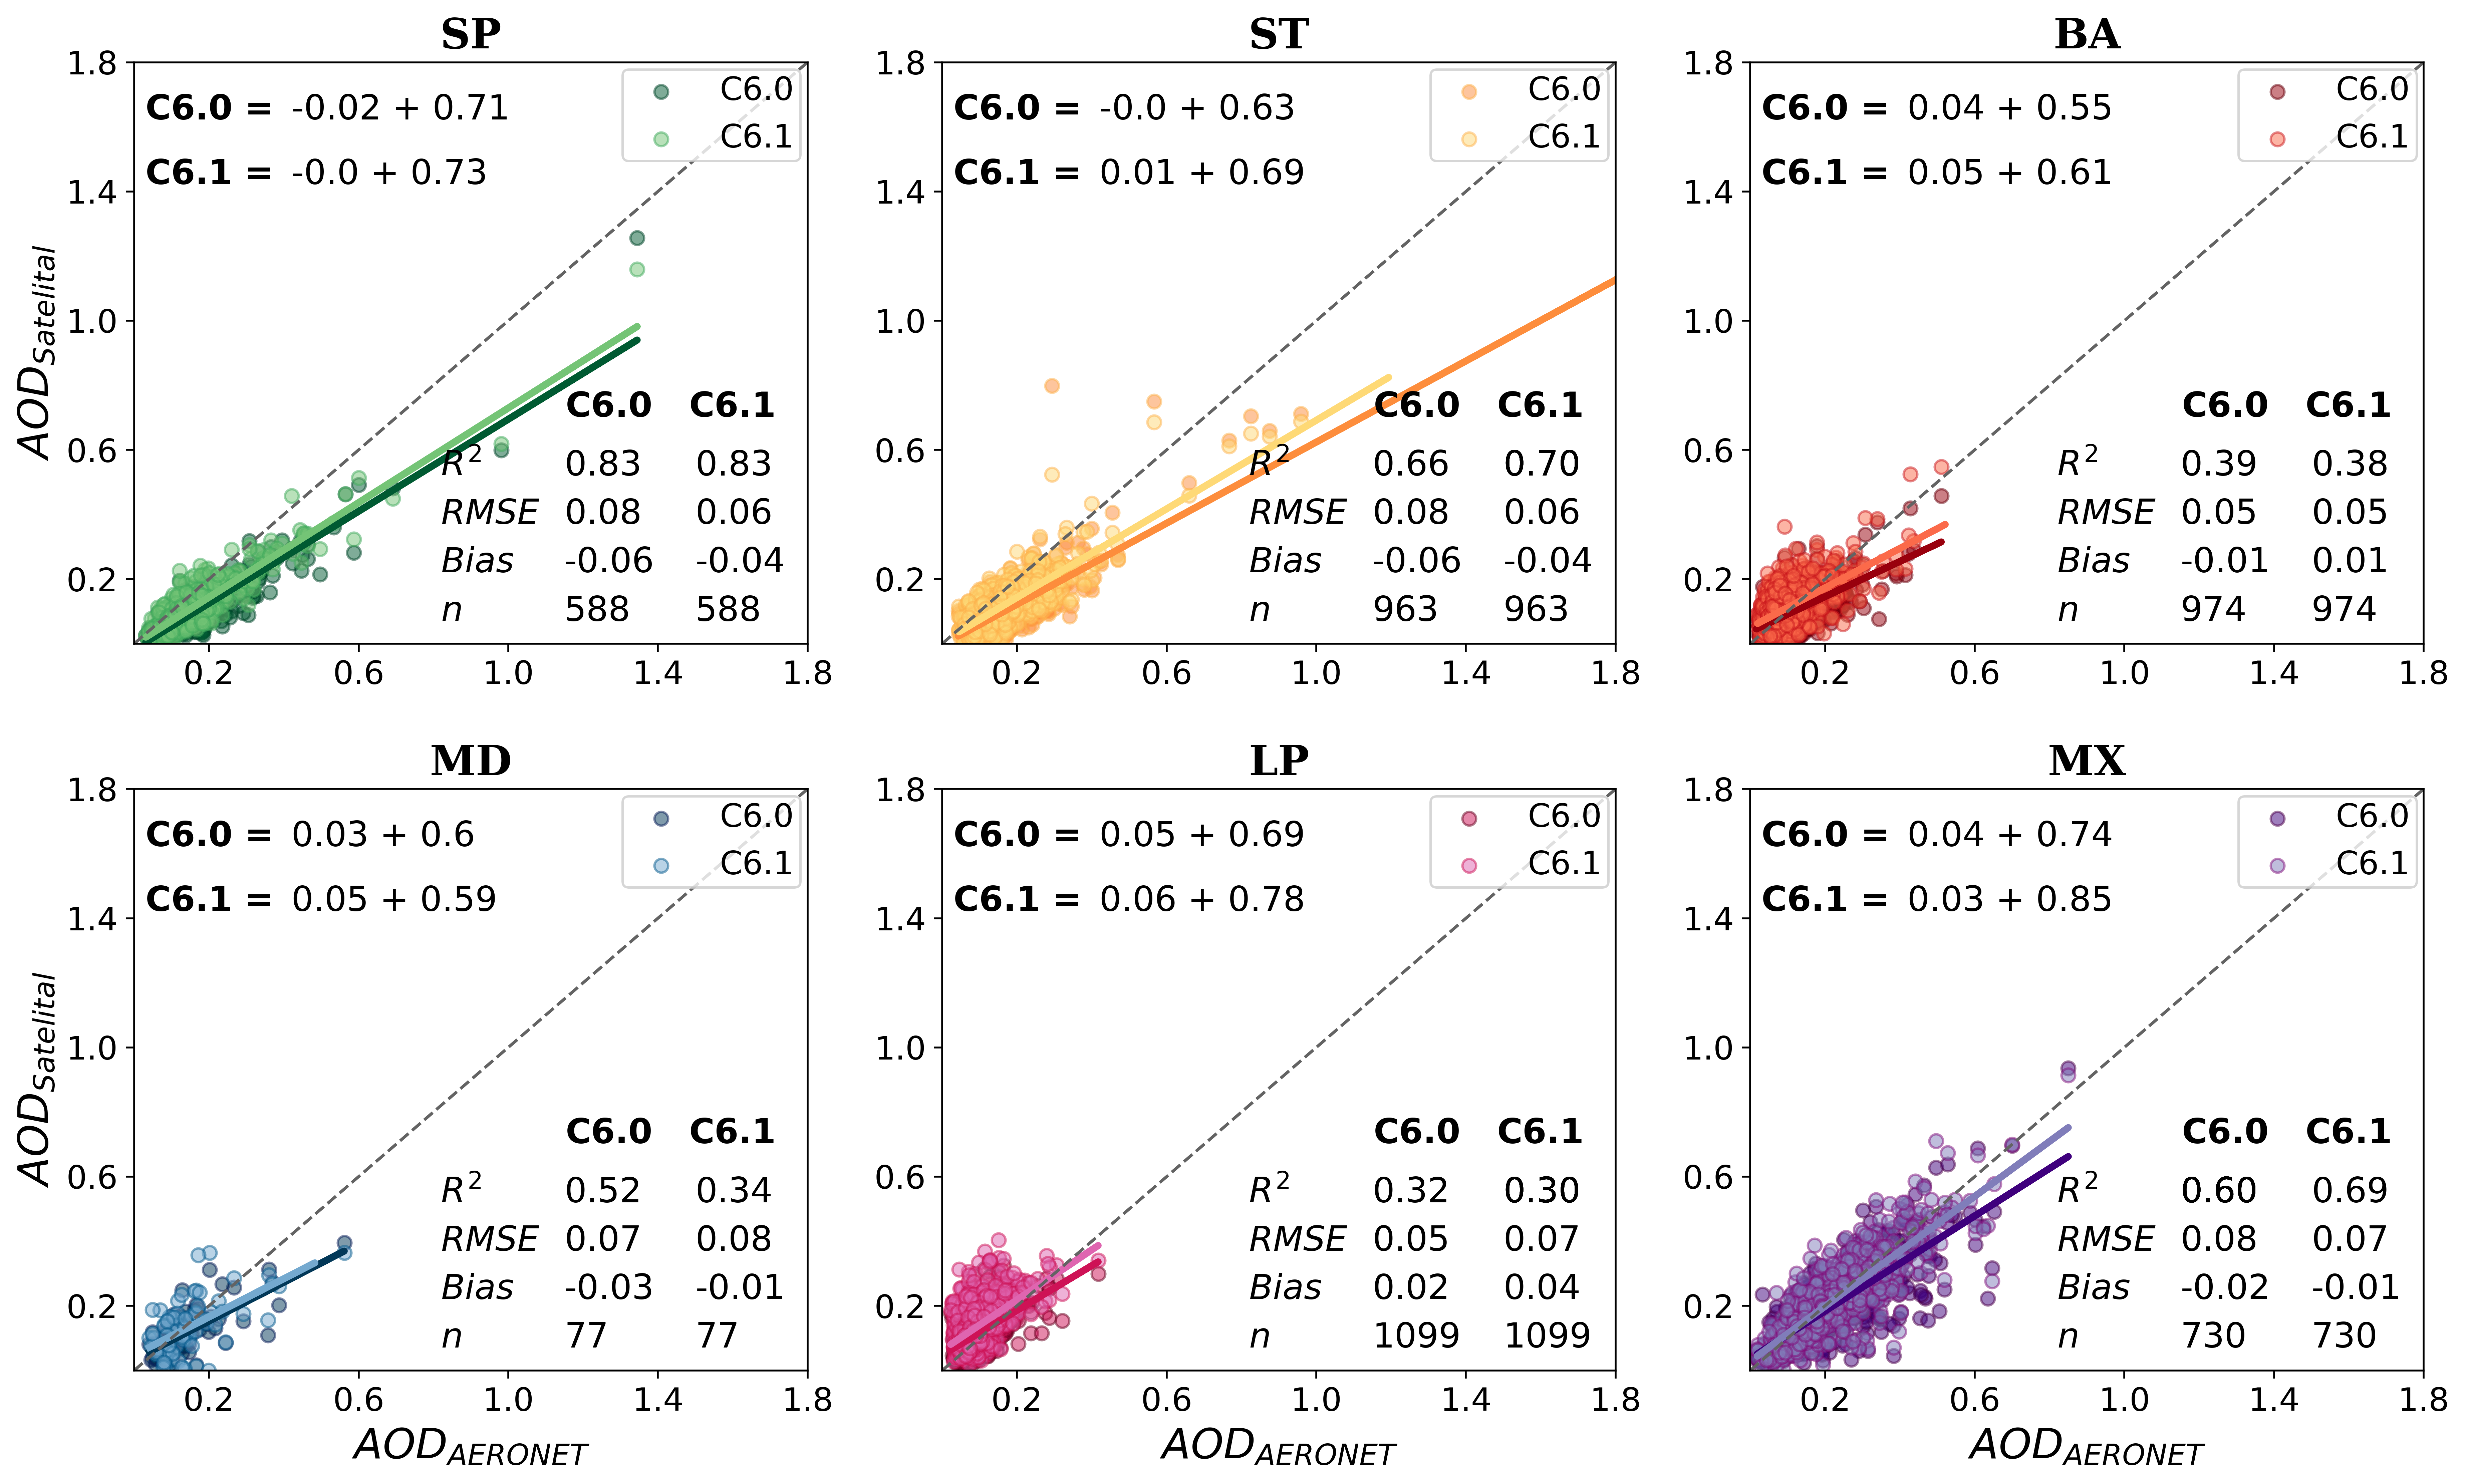

In [24]:
# Regrsion lineal C6
date_format='%d/%m/%Y'
nrows=2
ncols=3
plot='no'
### "Comparativa buffer 30min - Dia"
color_maiac_61 = ["#74c476","#fed976","#fb6a4a", "#74a9cf","#df65b0","#807dba"]
color_maiac_60 = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"] # CHILE "#fd8d3c"
edge_color_maiac_60 = ["#004529", "#feb24c","#67000d","#081d58","#67001f","#4d004b"]
edge_color_maiac_61 = ["#41ab5d","#feb24c","#cb181d","#045a8d","#ce1256","#810f7c"]
#resolucion_espaciotemporal = "Comparativa Collection 60min-1km - Dia Latam"
resolucion_espaciotemporal = ""
dir_path_latam ="D:/Josefina/paper_git/paper_maiac/datasets/V02/processed/merge_C60C61/Latam"
regresion = linear_regression_Versiones (resolucion_espaciotemporal = resolucion_espaciotemporal, path=dir_path_latam,date_format=date_format,nrows=nrows,ncols=ncols,plot=plot,color_maiac_61=color_maiac_61,color_maiac_60=color_maiac_60,edge_color_maiac_60=edge_color_maiac_60,edge_color_maiac_61=edge_color_maiac_61)


### REU MAIAC C6.1 vs C6.0

67.45 84.46
74.93 97.54
87.87 79.45
79.04 70.27
129.92 90.96
47.05 55.3


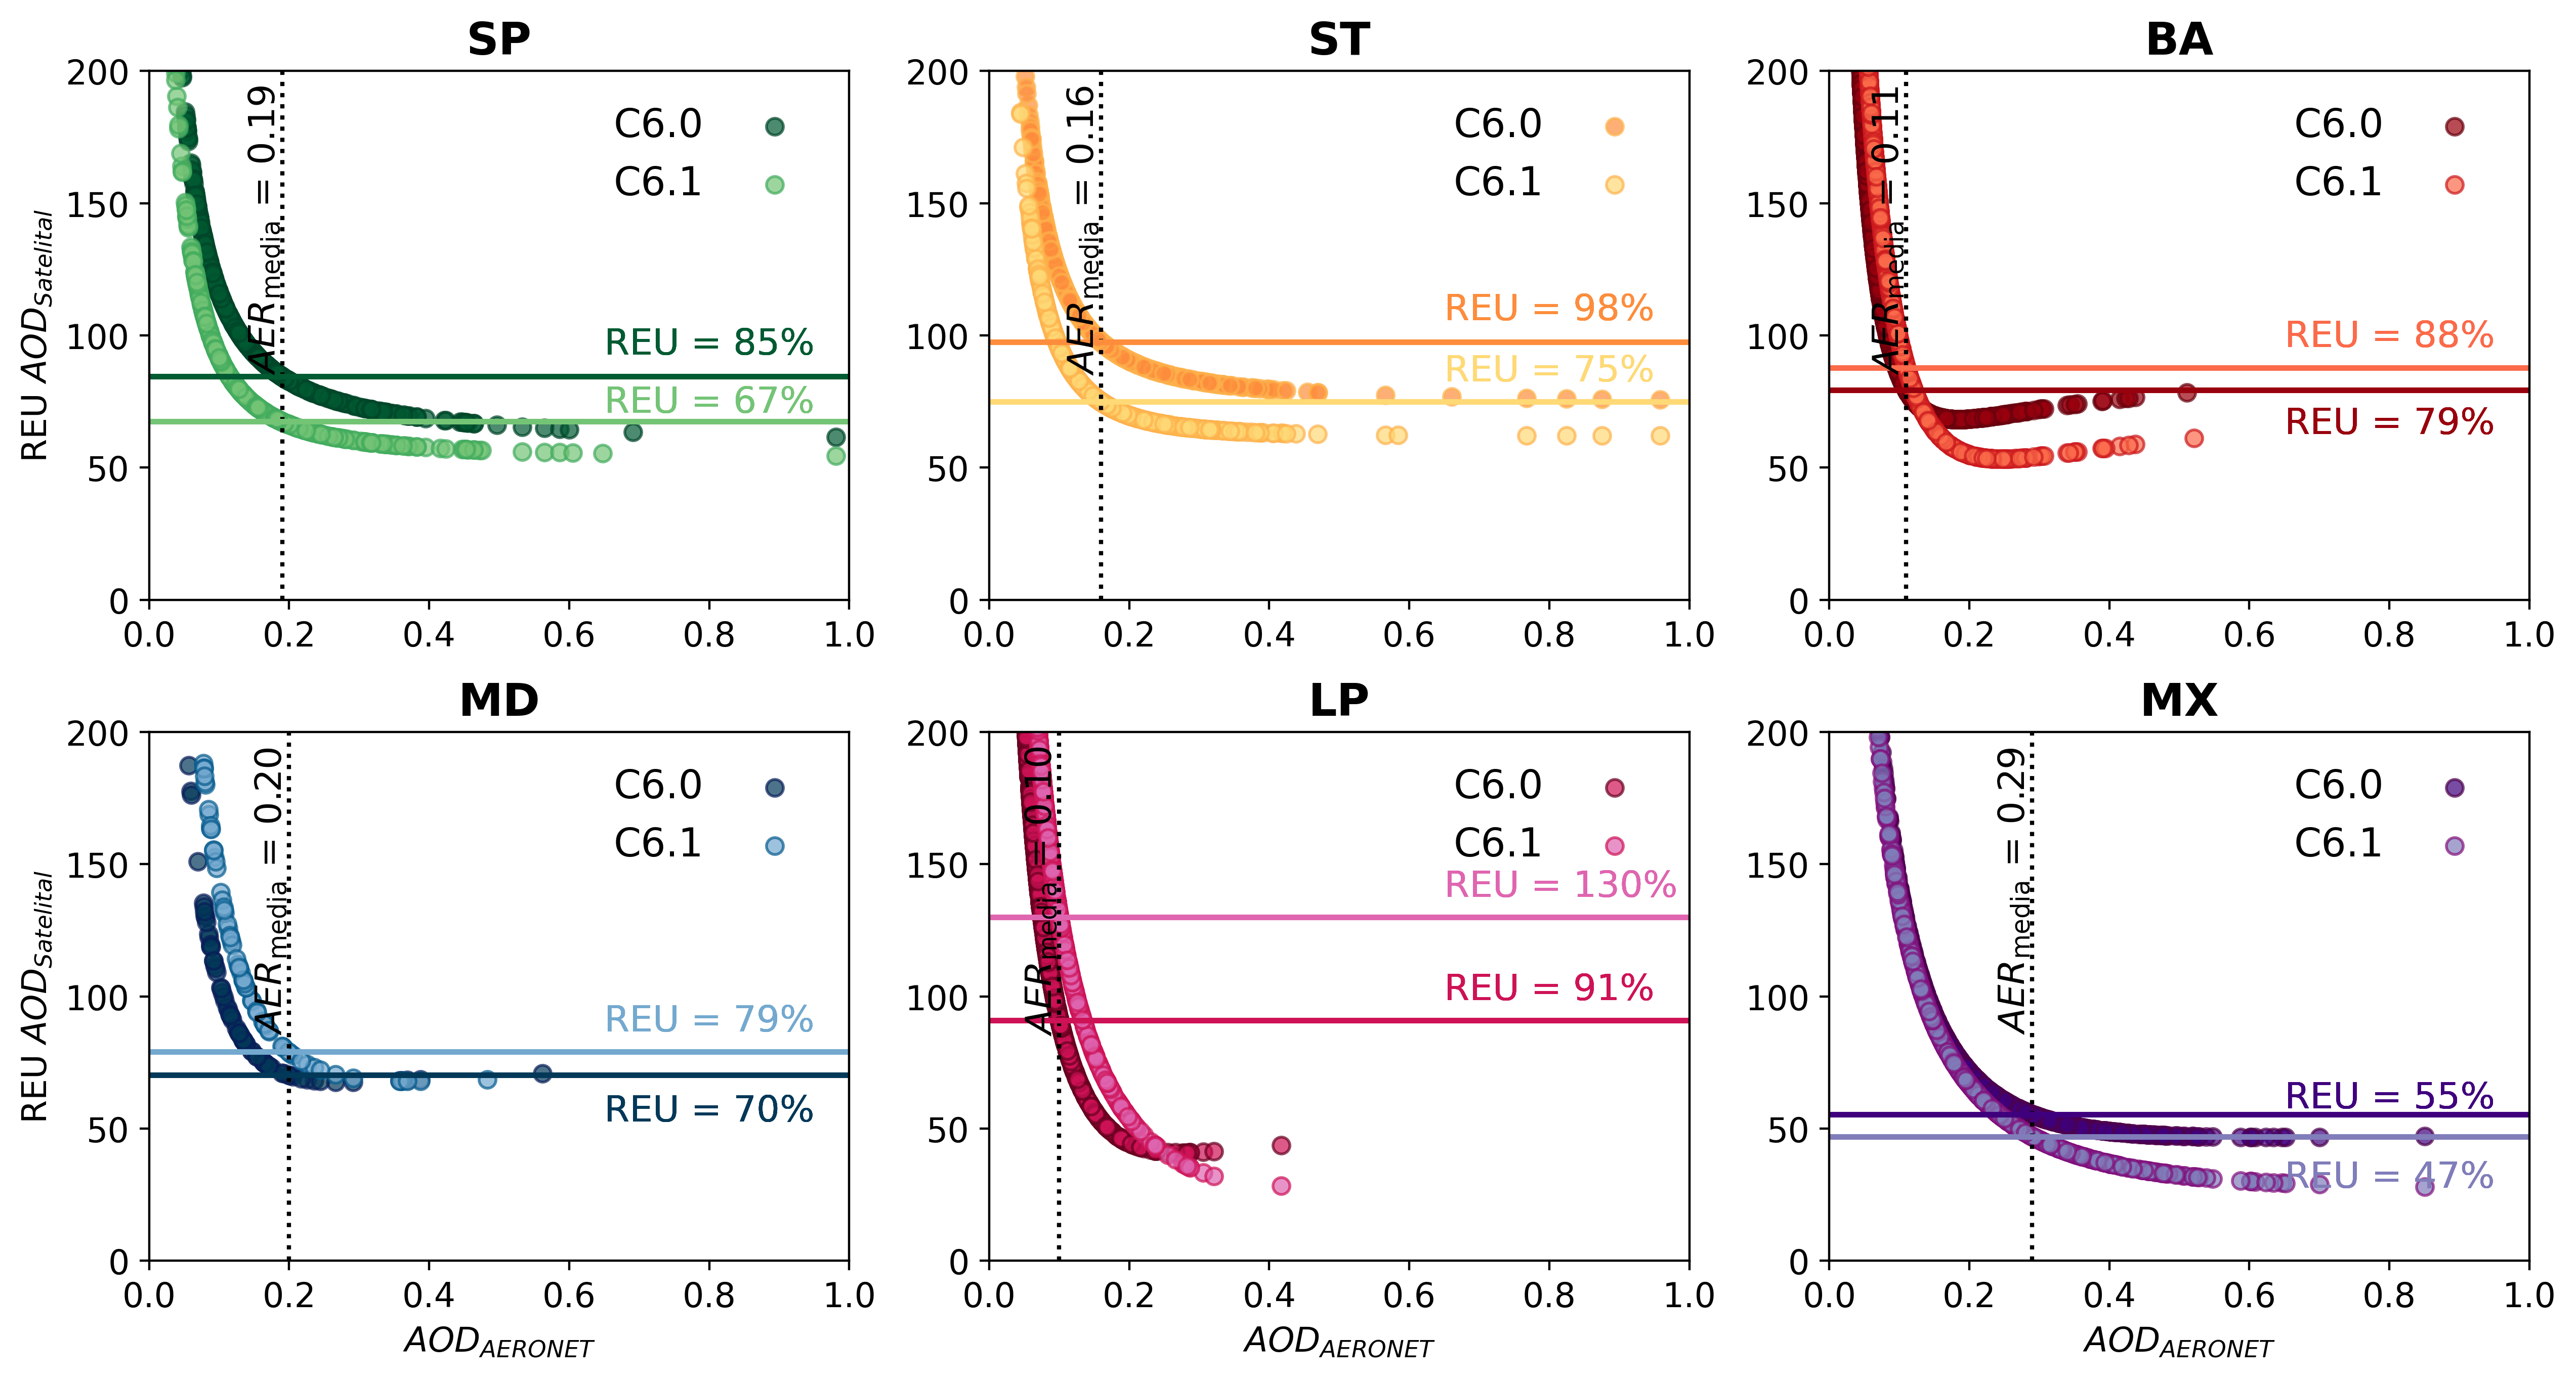

In [40]:
def REU_list(DF, Lambda=1, u_xi=0.0):
    # Initializing the error and results lists
    list_u_1 = []
    list_reu_1 = []
    list_bias_1 = []
    list_noise_1 = []
    list_reux_1 = []
    list_biasx_1 = []
    list_noisex_1 = []
    ## for C6.1
    list_u_3 = []
    list_reu_3 = []
    list_bias_3 = []
    list_noise_3 = []
    list_reux_3 = []
    list_biasx_3 = []
    list_noisex_3 = []

    # AOD and pollutant data for C6.0 and C6.1
    x_1 = DF['AOD_550_AER_mean_60']  # AERONET C6.0
    y_1 = DF["AOD_550_maiac_mean_60"]  # Pollutant C6.0
    x_3 = DF['AOD_550_AER_mean_61']  # AERONET C6.1
    y_3 = DF["AOD_550_maiac_mean_61"]  # Pollutant C6.1

    # Masking NaNs
    mask_1 = ~np.isnan(x_1) & ~np.isnan(y_1)
    x_1 = x_1[mask_1]
    y_1 = y_1[mask_1]
    n_1 = len(x_1)

    mask_3 = ~np.isnan(x_3) & ~np.isnan(y_3)
    x_3 = x_3[mask_3]
    y_3 = y_3[mask_3]
    n_3 = len(x_3)

    # Linear regression
    slope_1, intercept_1, r_1, p_1, stderr_1 = scipy.stats.linregress(x_1, y_1)
    slope_3, intercept_3, r_3, p_3, stderr_3 = scipy.stats.linregress(x_3, y_3)

    # Error variance calculation
    rss_1 = (y_1 - intercept_1 - slope_1 * x_1) ** 2
    RSS_1 = rss_1.values.sum()
    Sigma_v_sqr_1 = RSS_1 / (n_1 - 2)
    
    rss_3 = (y_3 - intercept_3 - slope_3 * x_3) ** 2
    RSS_3 = rss_3.values.sum()
    Sigma_v_sqr_3 = RSS_3 / (n_3 - 2)

    # Error due to the deviation of the 1:1 line
    ec_1 = (intercept_1 + (slope_1 - 1) * x_1) ** 2
    ran_1 = Sigma_v_sqr_1 - u_xi ** 2

    ec_3 = (intercept_3 + (slope_3 - 1) * x_3) ** 2
    ran_3 = Sigma_v_sqr_3 - u_xi ** 2

    # Results for C6.0 and C6.1
    U_1 = np.sqrt(ran_1 + ec_1)
    REU_1 = (2 * 100 / y_1) * U_1
    bias_1 = np.sqrt(((2 * 100 / y_1) ** 2) * ec_1)
    noise_1 = np.sqrt(((2 * 100 / y_1) ** 2) * ran_1)
    
    U_3 = np.sqrt(ran_3 + ec_3)
    REU_3 = (2 * 100 / y_3) * U_3
    bias_3 = np.sqrt(((2 * 100 / y_3) ** 2) * ec_3)
    noise_3 = np.sqrt(((2 * 100 / y_3) ** 2) * ran_3)

    # Store results in lists
    list_u_1.append(U_1)
    list_reu_1.append(REU_1)
    list_bias_1.append(bias_1)
    list_noise_1.append(noise_1)
    list_reux_1.append(2 * U_1 * 100 / x_1)
    list_biasx_1.append(np.sqrt(((2 * 100 / x_1) ** 2) * ec_1))
    list_noisex_1.append(np.sqrt(((2 * 100 / x_1) ** 2) * ran_1))
    
    list_u_3.append(U_3)
    list_reu_3.append(REU_3)
    list_bias_3.append(bias_3)
    list_noise_3.append(noise_3)
    list_reux_3.append(2 * U_3 * 100 / x_3)
    list_biasx_3.append(np.sqrt(((2 * 100 / x_3) ** 2) * ec_3))
    list_noisex_3.append(np.sqrt(((2 * 100 / x_3) ** 2) * ran_3))

    # Concatenate the results
    REU_1 = pd.concat(list_reu_1, axis=1)
    REUx_1 = pd.concat(list_reux_1, axis=1)
    REU_3 = pd.concat(list_reu_3, axis=1)
    REUx_3 = pd.concat(list_reux_3, axis=1)

    # Combine the data into a final DataFrame
    result = pd.concat([DF['AOD_550_AER_mean_60'], REUx_1, DF['AOD_550_AER_mean_61'], REUx_3], axis=1)
    result.columns = ["AOD_550_AER_mean_60", 'REUx_60', "AOD_550_AER_mean_61", 'REUx_61']

    return result
def REU_plot(path, date_format, nrows, ncols, plot, resolucion_espaciotemporal, 
             color_maiac_60, edge_color_maiac_60, color_maiac_61, edge_color_maiac_61,
             x_vert=0.18):
    
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    import os

    # Definir las medias específicas para cada estación
#     station_media = {
#         'sp': 0.18,
#         'st': 0.16,
#         'ba': 0.11,
#         'md': 0.2,
#         'lp': 0.08,
#         'mx': 0.29
#     }
    station_media = {
        'sp': 0.19,
        'st': 0.16,
        'ba': 0.11,
        'md': 0.2,
        'lp': 0.1,
        'mx': 0.29
    }

#     fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(16, 10), dpi=300)
    fig, ax = plt.subplots(ncols=ncols,nrows=nrows,  figsize=(12,6),dpi=400)
    fig.suptitle(resolucion_espaciotemporal, fontsize=22, fontweight='bold')

    for p, files in enumerate(os.listdir(path)):
        data = pd.read_csv(os.path.join(path, files))
        station_name = files[2:4]

        # Obtener la media correspondiente para la estación actual
        station_key = station_name.lower()
        x_vert = station_media.get(station_key, 0.18)  # Default a 0.18 si no se encuentra la estación

        df_REUxy = REU_list(DF=data, Lambda=1, u_xi=0.0)
#   result.columns = ["AOD_550_AER_mean_60", 'REUx_60', "AOD_550_AER_mean_61", 'REUx_61']
#modis ==> 60
#maiac ==> 61
        x_modis = df_REUxy["AOD_550_AER_mean_60"]
        y_modis = df_REUxy["REUx_60"]
        x_maiac = df_REUxy["AOD_550_AER_mean_61"]
        y_maiac = df_REUxy["REUx_61"]

        # Filtrar NaNs
        mask_modis = ~np.isnan(x_modis) & ~np.isnan(y_modis)
        mask_maiac = ~np.isnan(x_maiac) & ~np.isnan(y_maiac)

        x_modis = x_modis[mask_modis]
        y_modis = y_modis[mask_modis]
        x_maiac = x_maiac[mask_maiac]
        y_maiac = y_maiac[mask_maiac]

        # Encontrar valores de REUx donde x = x_vert
        idx_closest_modis = (np.abs(x_modis - x_vert)).idxmin()
        y_horiz_modis = y_modis.loc[idx_closest_modis]

        idx_closest_maiac = (np.abs(x_maiac - x_vert)).idxmin()
        y_horiz_maiac = y_maiac.loc[idx_closest_maiac]

        row = p // ncols
        col = p % ncols

        ax[row, col].scatter(x_modis, y_modis, color=color_maiac_60[p],
                             edgecolor=edge_color_maiac_60[p], alpha=0.7, label='C6.0')
        ax[row, col].scatter(x_maiac, y_maiac, color=color_maiac_61[p],
                             edgecolor=edge_color_maiac_61[p], alpha=0.7, label='C6.1')

        # Líneas de referencia para las estaciones
        ax[row, col].axvline(x=x_vert, color='k', linestyle=':', lw=1.5)
        
        # Añadir línea vertical y texto para cada estación según su media
        #ax[row, col].vlines(x=x_vert, ymin=0, ymax=300, color=color_maiac_61[p], linewidth=1, alpha=0.8, linestyle='-')
#         ax[row, col].text(x_vert-0.05, 100, f" $AER_{media}$ = {x_vert:.2f}", rotation=90, va='center', size=13)
        ax[row, col].text(x_vert-0.05, 140, f"$AER_{{\\mathrm{{media}}}}$ = {x_vert:.2f}", rotation=90, va='center', size=13)


        ax[row, col].axhline(y=y_horiz_modis, color=color_maiac_60[p],  lw=2)#linestyle=':',
        ax[row, col].axhline(y=y_horiz_maiac, color=color_maiac_61[p], lw=2)#linestyle='-.'
        print(round(y_horiz_maiac,2),round(y_horiz_modis,2))
        # c6.1 vs 6.0
#         67.45 84.46
#         74.93 97.54
#         87.87 79.45
#         79.04 70.27
#         129.92 90.96
#         47.05 55.3
        ax[0, 0].text(x=0.65, y=63 + 5,s=f"REU = 67%", color=color_maiac_61[0],fontsize=13, verticalalignment='bottom')
        ax[0, 1].text(x=0.65, y=75 + 5,s=f"REU = 75%", color=color_maiac_61[1],fontsize=13, verticalalignment='bottom')
        ax[0, 2].text(x=0.65, y=88 + 5,s=f"REU = 88%", color=color_maiac_61[2],fontsize=13, verticalalignment='bottom')
        ax[1, 0].text(x=0.65, y=79 + 5,s=f"REU = 79%", color=color_maiac_61[3],fontsize=13, verticalalignment='bottom')
        ax[1, 1].text(x=0.65, y=130 + 5,s=f"REU = 130%", color=color_maiac_61[4],fontsize=13, verticalalignment='bottom')
        ax[1, 2].text(x=0.65, y=20 + 5,s=f"REU = 47%", color=color_maiac_61[5],fontsize=13, verticalalignment='bottom')

        
        #color_maiac_61[1]
        ax[0, 0].text(x=0.65, y=85 + 5, s=f"REU = 85%", color=color_maiac_60[0],fontsize=13, verticalalignment='bottom')
        ax[0, 1].text(x=0.65, y=98 + 5, s=f"REU = 98%", color=color_maiac_60[1],fontsize=13, verticalalignment='bottom')
        ax[0, 2].text(x=0.65, y=55 + 5, s=f"REU = 79%", color=color_maiac_60[2],fontsize=13, verticalalignment='bottom')
        ax[1, 0].text(x=0.65, y=45 + 5, s=f"REU = 70%", color=color_maiac_60[3],fontsize=13, verticalalignment='bottom')
        ax[1, 1].text(x=0.65, y=91 + 5, s=f"REU = 91%", color=color_maiac_60[4],fontsize=13, verticalalignment='bottom')
        ax[1, 2].text(x=0.65, y=50  + 5, s=f"REU = 55%", color=color_maiac_60[5],fontsize=13, verticalalignment='bottom')
  

#       ax[row, col].text(x=0.5, y=y_horiz_modis + 5,
#                           s=f"REUx = {y_horiz_modis:.2f}%", color=color_maiac_60[p],
#                           fontsize=14, verticalalignment='bottom')

#         ax[row, col].text(x=0.5, y=y_horiz_maiac + 5,
#                           s=f"REUx ={y_horiz_maiac:.2f}%", color=color_maiac_61[p],
#                           fontsize=14, verticalalignment='bottom')
        

                # Formato del gráfico
        ax[row, col].set_xlim(0, 1)
        ax[row, col].set_ylim(0, 200)
        ax[row, col].set_title(f'{station_name}', fontsize=16, fontweight='bold')
        ax[row, col].tick_params(axis='both', labelsize=12)
        ax[row, col].grid(False)
        ax[row, col].legend(frameon=False, markerfirst=False, fontsize=14)
        ax[0, 0].set_ylabel(r'REU $AOD_{Satelital}$',size=12)
        ax[0, 1].set_ylabel(r'',size=14)
        ax[0, 2].set_ylabel(r'',size=14)
        ax[1, 0].set_ylabel(r'REU $AOD_{Satelital}$',size=12)
        ax[1, 1].set_ylabel(r'',size=14)
        ax[1, 2].set_ylabel(r'',size=14)
        
        ax[0, 0].set_xlabel(r'',size=14)
        ax[0, 1].set_xlabel(r'',size=14)
        ax[0, 1].set_xlabel(r'',size=14)
        ax[1, 0].set_xlabel(r'$AOD_{AERONET}$',size=12)
        ax[1, 1].set_xlabel(r'$AOD_{AERONET}$',size=12)
        ax[1, 2].set_xlabel(r'$AOD_{AERONET}$',size=12)
#         ax[row, col].set_ylabel(r'REU $AOD_{Satellite}$',size=10)
        # Mostrar leyenda solo en (0, 0)
#         if row == 0 and col == 0:
#             ax[row, col].legend(fontsize=11, loc='upper right')

        # Etiquetas de ejes
#         if col == 0:
#             ax[row, col].set_ylabel('REUx (%)', fontsize=13)
#         if row == nrows - 1:
#             ax[row, col].set_xlabel('AOD AERONET', fontsize=13)


#     ax[0, 0].text(x=0.5, y=67.57 - 5,
#                       s=f"REUx = 67.57%", color=color_maiac_61[0],
#                       fontsize=14, verticalalignment='bottom')
#     ax[0, 0].text(x=0.5, y=67.57 + 5,
#                       s=f"       ", color=color_maiac_61[0],
#                       fontsize=14, verticalalignment='bottom')
        plt.subplots_adjust(left=0.01,#0.125,
                            bottom=0.01,#0.1, 
                            right=0.99,#0.9, 
                            top=0.99,#0.9, 
                            wspace=0.2, 
                            hspace=0.25)#0.4)
    plt.show()


#"REUx 30min - Dia - C61 - Latam"
date_format='%Y-%m-%d'
nrows=2
ncols=3
plot ="no"
color_maiac_61 = ["#74c476","#fed976","#fb6a4a", "#74a9cf","#df65b0","#807dba"]
color_maiac_60 = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"] # CHILE "#fd8d3c"
edge_color_maiac_60 = ["#004529", "#feb24c","#67000d","#081d58","#67001f","#4d004b"]
edge_color_maiac_61 = ["#41ab5d","#feb24c","#cb181d","#045a8d","#ce1256","#810f7c"]

dir_path_latam ="D:/Josefina/paper_git/paper_maiac/datasets/V02/processed/merge_C60C61/Latam"
resolucion_espaciotemporal_30 = "  "
prueba_reu_plot = REU_plot(path=dir_path_latam,resolucion_espaciotemporal=resolucion_espaciotemporal_30, date_format=date_format,nrows=nrows,ncols=ncols,plot=plot,color_maiac_60=color_maiac_60, edge_color_maiac_60=edge_color_maiac_60,color_maiac_61=color_maiac_61, edge_color_maiac_61=edge_color_maiac_61)
prueba_reu_plot

# Colores mas oscuros, C6.0, Colores mass claros C6.1
#modis, color=color_maiac_60 

### Comparativa con Estados Unidos

In [ ]:
 Estaciones y colores
labels = ["GS", "GT", "MS", "CT", "SL", "UG"]
# colores = ["#2ca25f", "#dd1c77", "#2b8cbe", "#756bb1", "#fec44f", "#fc4e2a"]
colores = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"]
x = np.arange(len(labels))
labels_filtrados_blanco = [" ","","","", "",""]
# Valores para cada métrica
R2_USA = [0.82,0.43,0.21,0.56,0.22,0.65]
RMSE_USA= [0.08,0.15,0.22,0.1,0.1,0.17]
BIAS_USA= [0.02,0.11,0.16,0.04,0.07,0.12]


# Gráfico único: Media
fig, ax = plt.subplots(figsize=(10,4),dpi=200)

x = np.arange(len(labels))

# Barra de medias (ajustando el ancho de barra)
ax.bar(x, R2_USA, color=colores, edgecolor='black', alpha=0.7, width=0.5)  # Ancho de barra más angosto
ax.axhline(y=0.48, color="black", linewidth=2.3,  linestyle=':')
ax.text(len(x)-2, 0.49, 'Media = 0.48', ha='center', va='bottom', fontsize=15)
ax.set_ylabel(r'$R^{2}$', fontsize=16)
ax.set_ylim(0, 1)  # max(mean_vals) * 1.3)

# Etiquetas en el eje X (aumentando el tamaño de letra)
ax.set_xticks(x)
ax.set_xticklabels(labels_filtrados_blanco, fontsize=16)  # Aumento del tamaño de letra de los ticks en el eje X

# Eje Y a la izquierda (por defecto)
# ax.yaxis.tick_right()  # Elimina esta línea para que el eje Y esté en el lado izquierdo

# Estética
ax.tick_params(axis='y', labelsize=16)
ax.grid(False)
ax.set_xlim(-0.5, len(labels) - 0.5)

plt.tight_layout()
plt.show()

###############

# Gráfico único: SD (desviación estándar)
fig, ax = plt.subplots(figsize=(10,4),dpi=200)

# Barra de medias (ajustando el ancho de barra)
ax.bar(x, RMSE_USA, color=colores, edgecolor='black', alpha=0.7, width=0.5)  # Ancho de barra más angosto
ax.axhline(y=0.14, color="black", linewidth=2.3, linestyle=':')
ax.text(len(x)-2, 0.14, 'Media = 0.14', ha='center', va='bottom', fontsize=15)
ax.set_ylabel("RMSE", fontsize=16)
ax.set_ylim(0, 0.30)  # max(mean_vals) * 1.3)

# Etiquetas en el eje X (aumentando el tamaño de letra)
ax.set_xticks(x)
ax.set_xticklabels(labels_filtrados_blanco, fontsize=16)  # Aumento del tamaño de letra de los ticks en el eje X

# Eje Y a la izquierda
# ax.yaxis.tick_right()  # Elimina esta línea

# Estética
ax.tick_params(axis='y', labelsize=16)
ax.grid(False)
ax.set_xlim(-0.5, len(labels) - 0.5)

plt.tight_layout()
plt.show()

###############

# Gráfico único: % Missing Data
fig, ax = plt.subplots(figsize=(10,4),dpi=200)
# Barra de medias (ajustando el ancho de barra)
ax.bar(x, BIAS_USA, color=colores, edgecolor='black', alpha=0.7, width=0.5)  # Ancho de barra más angosto
ax.axhline(y=0.09, color="black", linewidth=2.3,  linestyle=':')
ax.axhline(y=0., color="black", linewidth=1)
ax.text(len(x)-2, 0.09, 'Media = 0.09', ha='center', va='bottom', fontsize=15)
ax.set_ylabel("Bias", fontsize=16)
ax.set_ylim(-0.2, 0.2)  # max(mean_vals) * 1.3)
ax.set_xlabel("USA", fontsize=20, labelpad=15)
# Etiquetas en el eje X (aumentando el tamaño de letra)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=16)  # Aumento del tamaño de letra de los ticks en el eje X

# Eje Y a la izquierda
# ax.yaxis.tick_right()  # Elimina esta línea

# Estética
ax.tick_params(axis='y', labelsize=16)
ax.grid(False)
ax.set_xlim(-0.5, len(labels) - 0.5)

plt.tight_layout()
plt.show()



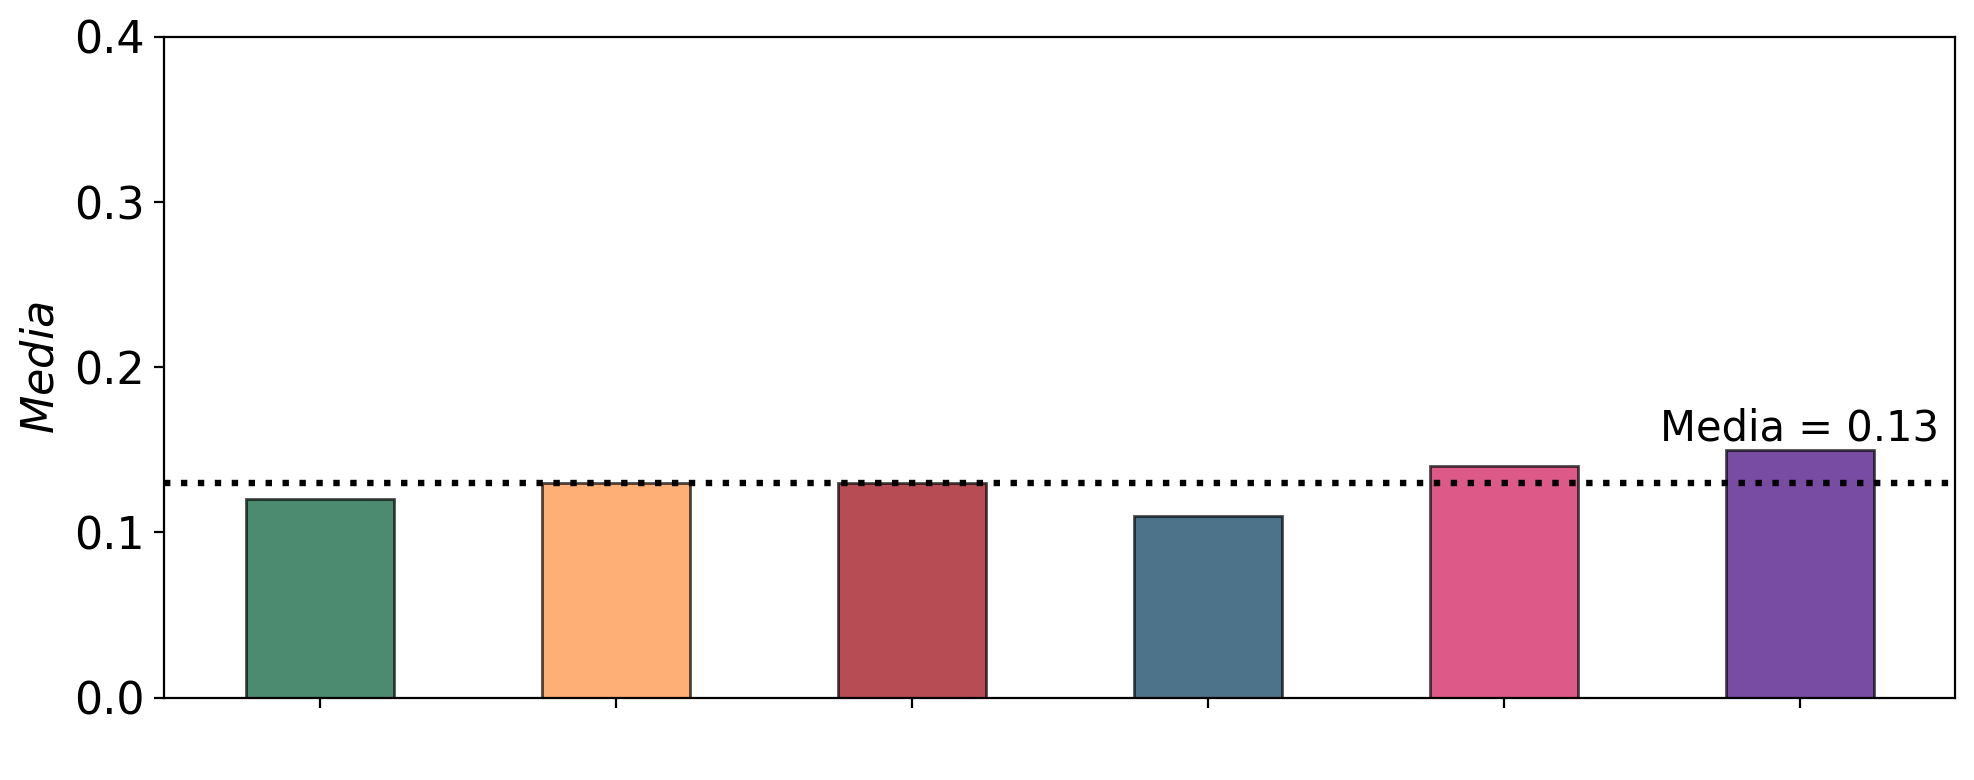

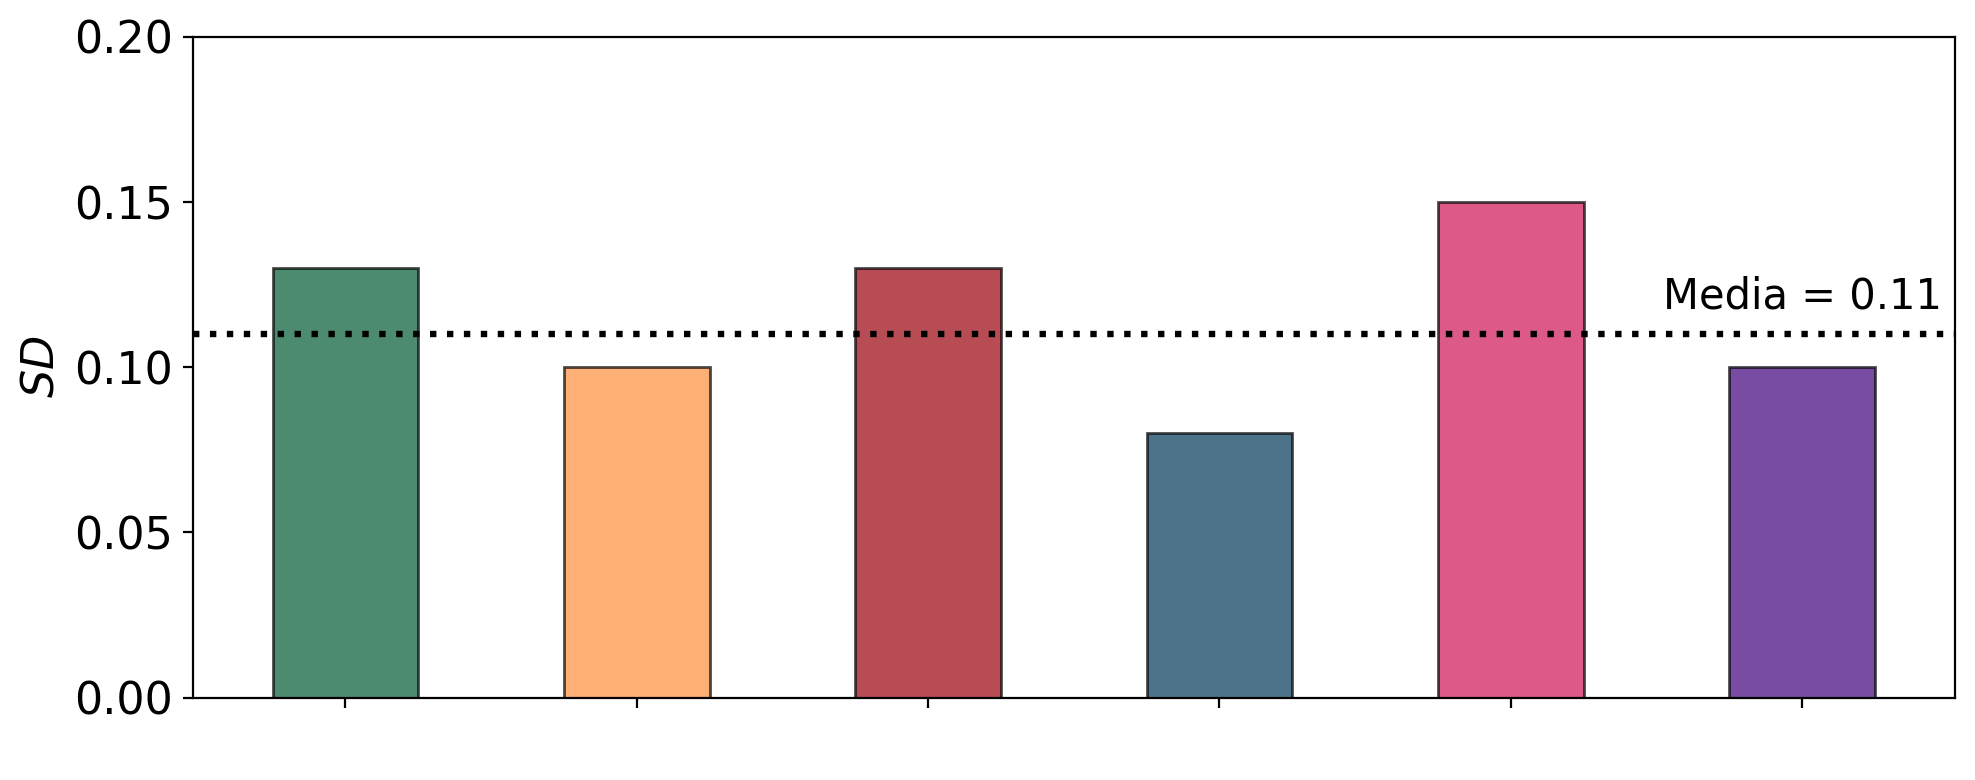

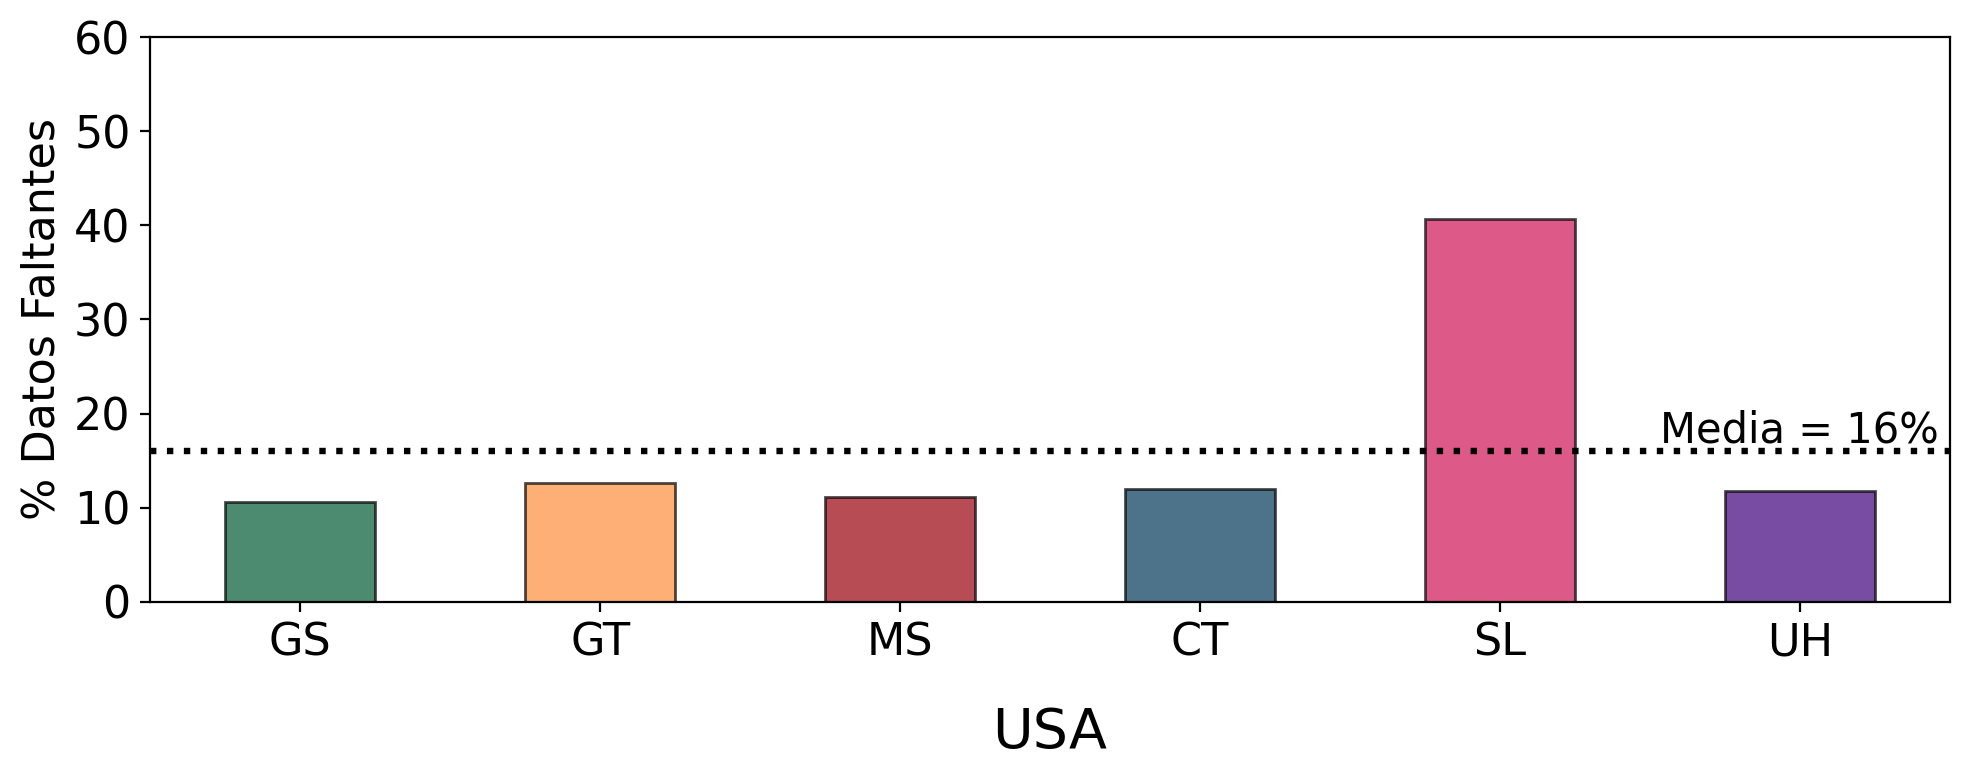

In [98]:
#  Estaciones y colores
labels = ["GS", "GT", "MS", "CT", "SL", "UH"]
# colores = ["#2ca25f", "#dd1c77", "#2b8cbe", "#756bb1", "#fec44f", "#fc4e2a"]
colores = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"]
x = np.arange(len(labels))
labels_filtrados_blanco = [" ","","","", "",""]
# Valores para cada métrica

media_USA = [0.12,0.13,0.13,0.11,0.14,0.15]
sd_USA= [0.13,0.10,0.13,0.08,0.15,0.1]
porc_USA= [10.63,12.62,11.15,11.95,40.62,11.77]



# Gráfico único: Media
fig, ax = plt.subplots(figsize=(10,4),dpi=200)

# x = np.arange(len(labels))
# Barras más juntas

# Barra de medias (ajustando el ancho de barra)
ax.bar(x, media_USA, color=colores, edgecolor='black', alpha=0.7, width=0.5)  # Ancho de barra más angosto
ax.axhline(y=0.13, color="black", linewidth=2.3,  linestyle=':')
ax.text(len(x)-1, 0.15, 'Media = 0.13', ha='center', va='bottom', fontsize=15)
ax.set_ylabel(r'$Media$', fontsize=16)
ax.set_ylim(0, 0.4)  # max(mean_vals) * 1.3)

# Etiquetas en el eje X (aumentando el tamaño de letra)
ax.set_xticks(x)
ax.set_xticklabels(labels_filtrados_blanco, fontsize=16)  # Aumento del tamaño de letra de los ticks en el eje X

# Eje Y a la izquierda (por defecto)
# ax.yaxis.tick_right()  # Elimina esta línea para que el eje Y esté en el lado izquierdo

# Estética
ax.tick_params(axis='y', labelsize=16)
ax.grid(False)
# ax.set_xlim(-0.5, len(labels) - 0.5)
# Eje Y a la derecha
# ax.yaxis.tick_right()
# ax.yaxis.set_label_position("right")
plt.tight_layout()
plt.show()

###############

# Gráfico único: SD (desviación estándar)
fig, ax = plt.subplots(figsize=(10,4),dpi=200)

# Barra de medias (ajustando el ancho de barra)
ax.bar(x, sd_USA, color=colores, edgecolor='black', alpha=0.7, width=0.5)  # Ancho de barra más angosto
ax.axhline(y=0.11, color="black", linewidth=2.3,  linestyle=':')
ax.text(len(x)-1, 0.115, 'Media = 0.11', ha='center', va='bottom', fontsize=15)
ax.set_ylabel(r'$SD$', fontsize=16)
ax.set_ylim(0, 0.20)  # max(mean_vals) * 1.3)

# Etiquetas en el eje X (aumentando el tamaño de letra)
ax.set_xticks(x)
ax.set_xticklabels(labels_filtrados_blanco, fontsize=16)  # Aumento del tamaño de letra de los ticks en el eje X

# Eje Y a la izquierda
# ax.yaxis.tick_right()  # Elimina esta línea

# Estética
ax.tick_params(axis='y', labelsize=16)
ax.grid(False)
# ax.set_xlim(-0.5, len(labels) - 0.5)
# Eje Y a la derecha
# ax.yaxis.tick_right()
# ax.yaxis.set_label_position("right")
plt.tight_layout()
plt.show()

###############

# Gráfico único: % Missing Data
fig, ax = plt.subplots(figsize=(10,4),dpi=200)

# Barra de medias (ajustando el ancho de barra)
ax.bar(x, porc_USA, color=colores, edgecolor='black', alpha=0.7, width=0.5)  # Ancho de barra más angosto
ax.axhline(y=16, color="black", linewidth=2.3,  linestyle=':')

ax.text(len(x)-1, 16, 'Media = 16%', ha='center', va='bottom', fontsize=15)
ax.set_ylabel('% Datos Faltantes', fontsize=16)
ax.set_ylim(0, 60)  # max(mean_vals) * 1.3)
ax.set_xlabel("USA", fontsize=20, labelpad=15)
# Etiquetas en el eje X (aumentando el tamaño de letra)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=16)  # Aumento del tamaño de letra de los ticks en el eje X

# Eje Y a la izquierda
# ax.yaxis.tick_right()  # Elimina esta línea

# Estética
ax.tick_params(axis='y', labelsize=16)
ax.grid(False)
ax.set_xlim(-0.5, len(labels) - 0.5)
# Eje Y a la derecha
# ax.yaxis.tick_right()
# ax.yaxis.set_label_position("right")

plt.tight_layout()
plt.show()



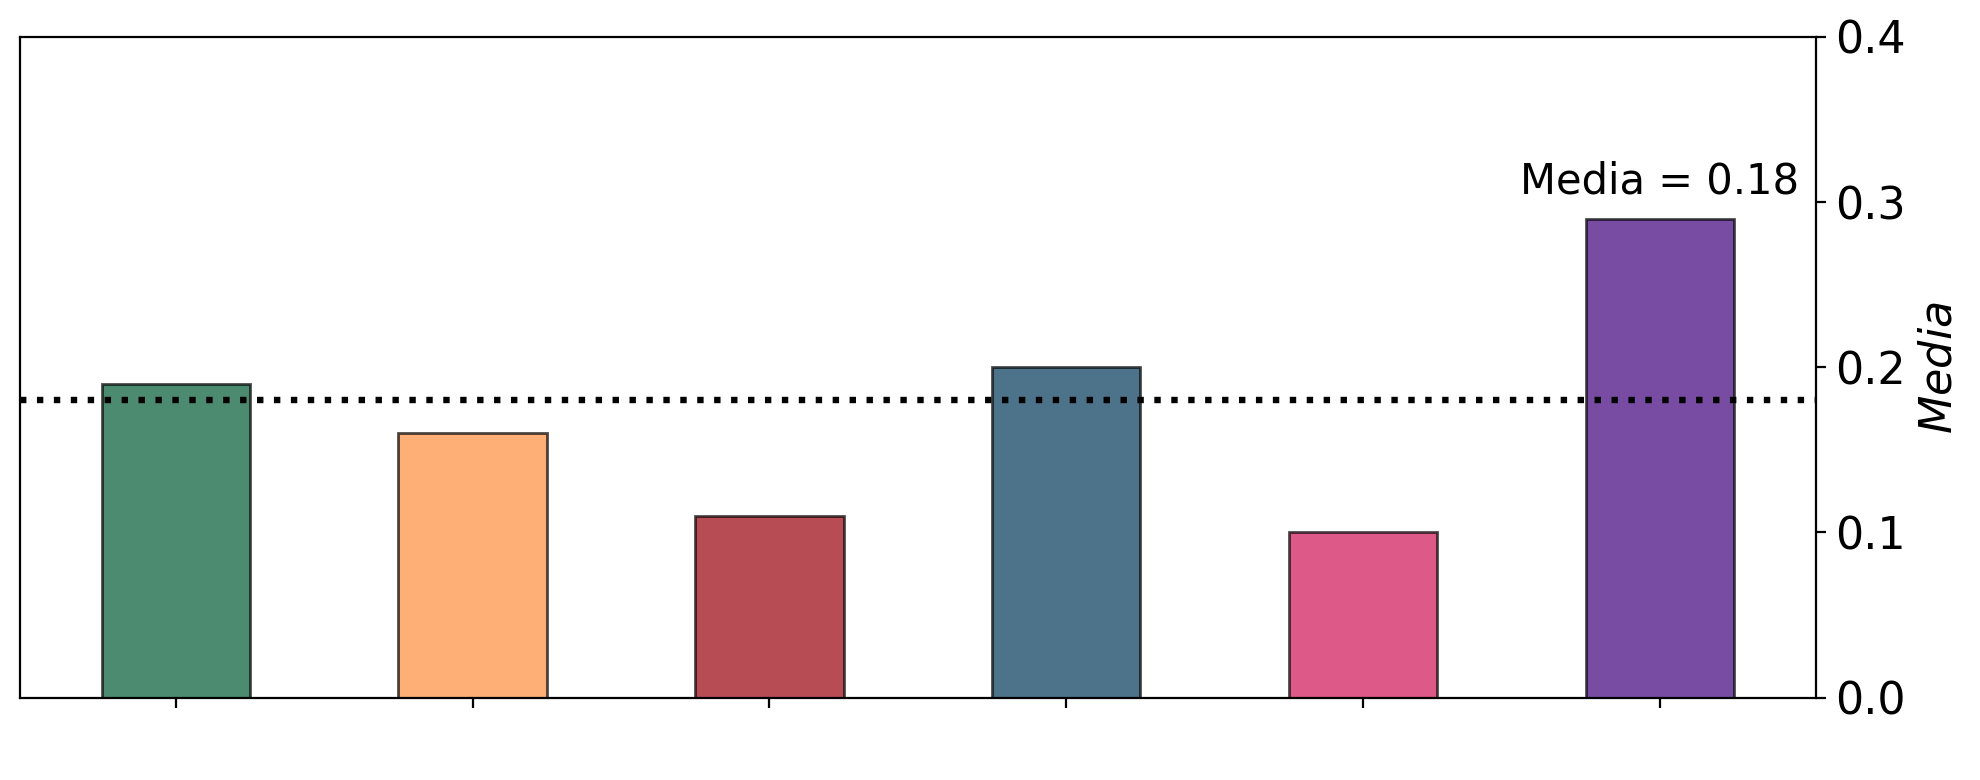

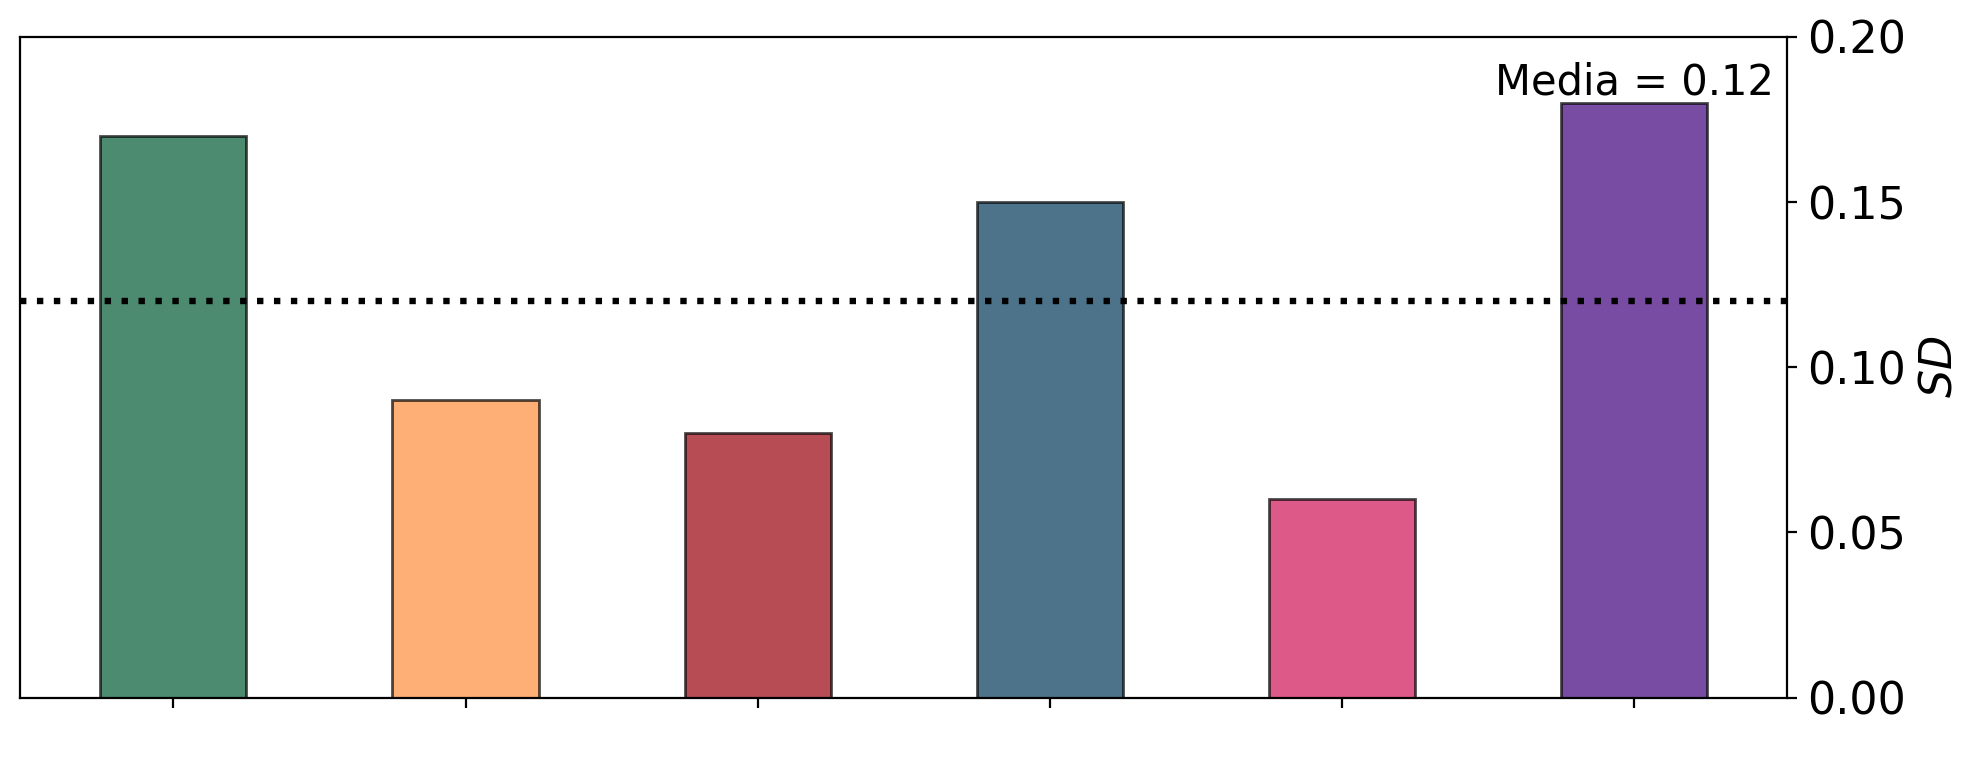

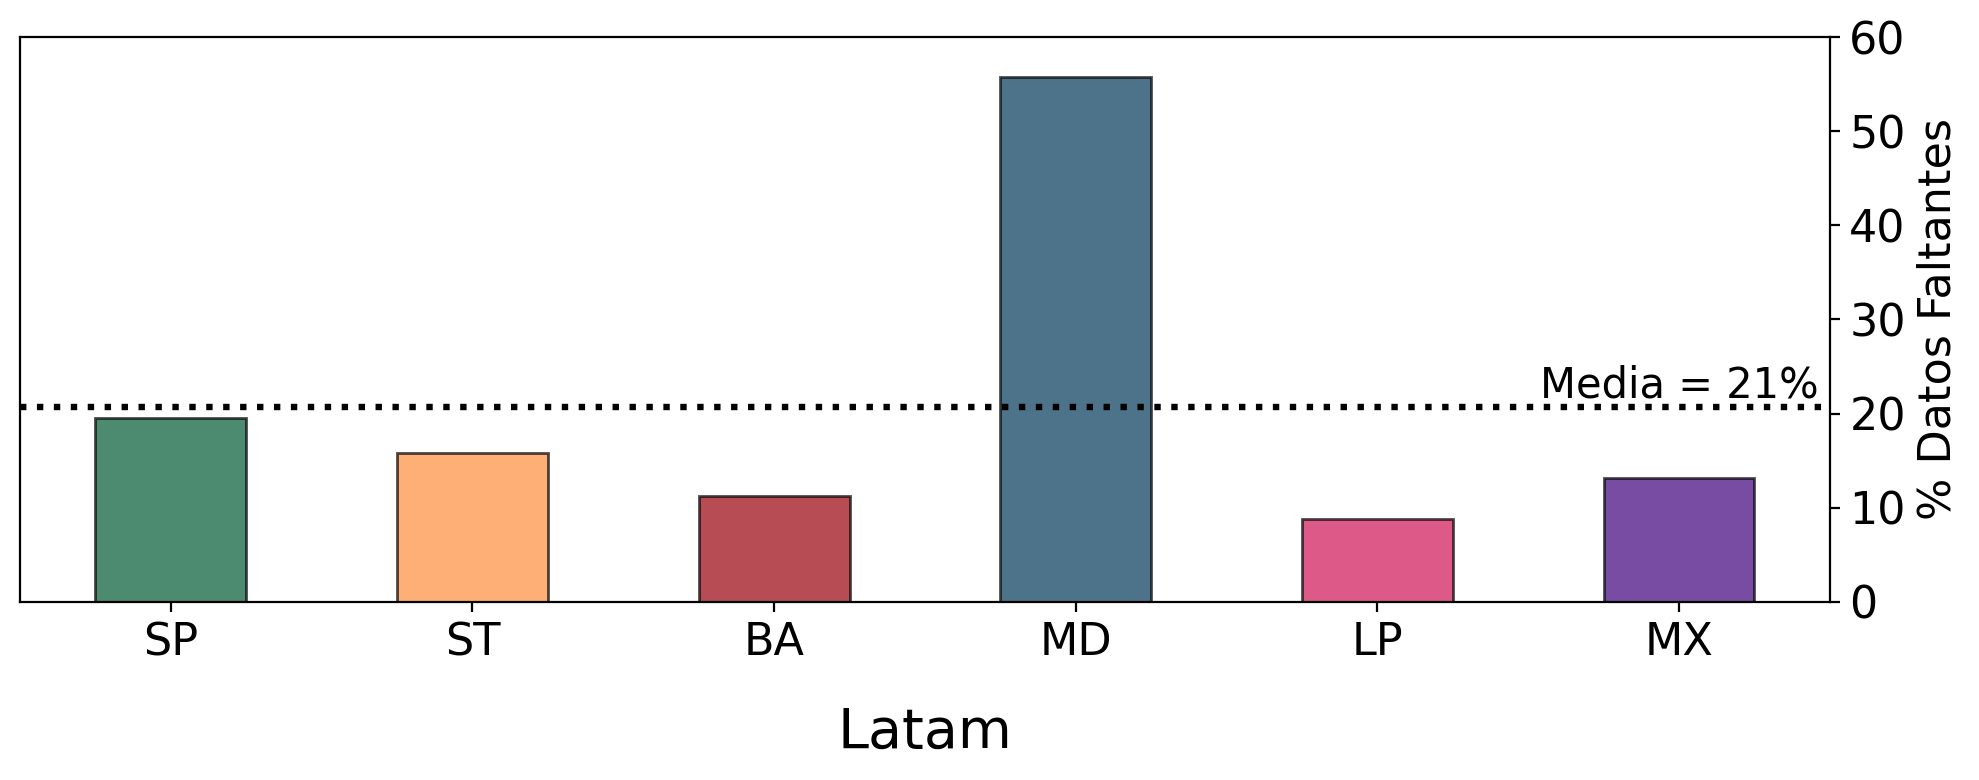

In [92]:
#  Estaciones y colores
labels = ["SP", "ST", "BA", "MD", "LP", "MX"]
# colores = ["#2ca25f", "#dd1c77", "#2b8cbe", "#756bb1", "#fec44f", "#fc4e2a"]
colores = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"]
x = np.arange(len(labels))
labels_filtrados_blanco = [" ","","","", "",""]
# Valores para cada métrica

media_Latam = [0.19,0.16,0.11,0.20,0.10,0.29]
sd_Latam= [0.17,0.09,0.08,0.15,0.06,0.18]
porc_Latam= [19.55,15.85,11.29,55.78,8.78,13.20]



# Gráfico único: Media
fig, ax = plt.subplots(figsize=(10,4),dpi=200)

# x = np.arange(len(labels))
# Barras más juntas

# Barra de medias (ajustando el ancho de barra)
ax.bar(x, media_Latam, color=colores, edgecolor='black', alpha=0.7, width=0.5)  # Ancho de barra más angosto
ax.axhline(y=0.18, color="black", linewidth=2.3,  linestyle=':')
ax.text(len(x)-1, 0.30, 'Media = 0.18', ha='center', va='bottom', fontsize=15)
ax.set_ylabel(r'$Media$', fontsize=16)
ax.set_ylim(0, 0.4)  # max(mean_vals) * 1.3)

# Etiquetas en el eje X (aumentando el tamaño de letra)
ax.set_xticks(x)
ax.set_xticklabels(labels_filtrados_blanco, fontsize=16)  # Aumento del tamaño de letra de los ticks en el eje X

# Eje Y a la izquierda (por defecto)
# ax.yaxis.tick_right()  # Elimina esta línea para que el eje Y esté en el lado izquierdo

# Estética
ax.tick_params(axis='y', labelsize=16)
ax.grid(False)
#ax.set_xlim(-0.5, len(labels) - 0.5)
# Eje Y a la derecha
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
plt.tight_layout()
plt.show()

###############

# Gráfico único: SD (desviación estándar)
fig, ax = plt.subplots(figsize=(10,4),dpi=200)

# Barra de medias (ajustando el ancho de barra)
ax.bar(x, sd_Latam, color=colores, edgecolor='black', alpha=0.7, width=0.5)  # Ancho de barra más angosto
ax.axhline(y=0.12, color="black", linewidth=2.3,  linestyle=':')
ax.text(len(x)-1, 0.18, 'Media = 0.12', ha='center', va='bottom', fontsize=15)
ax.set_ylabel(r'$SD$', fontsize=16)
ax.set_ylim(0, 0.20)  # max(mean_vals) * 1.3)

# Etiquetas en el eje X (aumentando el tamaño de letra)
ax.set_xticks(x)
ax.set_xticklabels(labels_filtrados_blanco, fontsize=16)  # Aumento del tamaño de letra de los ticks en el eje X

# Eje Y a la izquierda
# ax.yaxis.tick_right()  # Elimina esta línea

# Estética
ax.tick_params(axis='y', labelsize=16)
ax.grid(False)
# ax.set_xlim(-0.5, len(labels) - 0.5)
# Eje Y a la derecha
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
plt.tight_layout()
plt.show()

###############

# Gráfico único: % Missing Data
fig, ax = plt.subplots(figsize=(10,4),dpi=200)

# Barra de medias (ajustando el ancho de barra)
ax.bar(x, porc_Latam, color=colores, edgecolor='black', alpha=0.7, width=0.5)  # Ancho de barra más angosto
ax.axhline(y=20.74, color="black", linewidth=2.3,  linestyle=':')

ax.text(len(x)-1, 20.74, 'Media = 21%', ha='center', va='bottom', fontsize=15)
ax.set_ylabel('% Datos Faltantes', fontsize=16)
ax.set_ylim(0, 60)  # max(mean_vals) * 1.3)
ax.set_xlabel("Latam", fontsize=20, labelpad=15)
# Etiquetas en el eje X (aumentando el tamaño de letra)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=16)  # Aumento del tamaño de letra de los ticks en el eje X

# Eje Y a la izquierda
# ax.yaxis.tick_right()  # Elimina esta línea

# Estética
ax.tick_params(axis='y', labelsize=16)
ax.grid(False)
ax.set_xlim(-0.5, len(labels) - 0.5)
# Eje Y a la derecha
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

plt.tight_layout()
plt.show()



In [ ]:
# Guardado de REU para plot

In [115]:
def REU_list(DF, Pollutant, Units, Lambda = 1, u_xi = 0.0):
    '''This function allows us to calculate the relative expanded uncertainty
    Variables:
    DF: It is a dataframe with the satellite AOD values (MAIAC and MODIS) and the AERONET reference AOD
    Pollutant: name of the reference pollutant, in our case AERONET
    Units: name of the variables we want to analyze. In our case MAIAC and MODIS
    '''
    
    #NOTE: Sigma_err_x (NILU notation) is the same as u_xi (GDE2010 notation)
    Sigma_err_x = u_xi
    # These are lists where I will save the different results
    list_u = []
    list_reu = []
    list_bias = []
    list_noise = []
    list_reux = []
    list_biasx = []
    list_noisex = []
    list_verificacion = []
  
    # The UNITS are covered, that is, the pollutant to be analyzed. In our case MAIAC and MODIS
    for Unit in Units:
        x = DF[Pollutant] #AERONET
        y = DF[Unit] # Pollutant
        
        #Masking the NaN's
        mask = ~np.isnan(x) & ~np.isnan(y)
        x = x[mask]
        y = y[mask]
        n = len(x)
        
        #Slope & Intercept usando REGRESION LINEAL (LR)
        slope, intercept, r, p, stderr = scipy.stats.linregress(x[mask], y[mask])
        b1 = slope
        b0 = intercept
        
        #Equation error variance for y = b0 + b1*x + v_i

        rss = (y - b0 - b1*x)**2
        RSS = rss.values.sum()
        Sigma_v_sqr = RSS/(n-2)
                
        #Error variance due to the deviation of the 1:1 line
        ec = (b0 + (b1 - 1)*x)**2
        ran = Sigma_v_sqr - Sigma_err_x**2
        
        #Results
        
        U = ((ran + ec)**(1/2))
        
        REU = ((2*100)/y)*U
        
        bias = ((((2*100)/y)**2)*ec)**(1/2)
        
        noise = ((((2*100)/y)**2)*ran)**(1/2)
        
        verificacion = ((bias**2 + noise**2)**(1/2))
        verificacion_u = ((bias**2 + noise**2)**(1/2))/((2*100)/y)
        
        REUx = 2*U*100/x
        
        biasx = ((((2*100)/x)**2)*ec)**(1/2)
        
        noisex = ((((2*100)/x)**2)*ran)**(1/2)
        
        #The results are each placed in a separate list
        list_u.append(U)
        list_reu.append(REU)
        list_bias.append(bias)
        list_noise.append(noise)
        list_verificacion.append(verificacion)
        list_reux.append(REUx)
        list_biasx.append(biasx)
        list_noisex.append(noisex)
    
    # The generated lists are concatenated
    U = pd.concat(list_u, axis=1)
    Col_Names=[]
    for i in Units:
        i = 'U_'+ i
        Col_Names.append(i)
    U.columns = Col_Names
    U.rename_axis("Timestamp", axis='index', inplace=True)
    
    REU = pd.concat(list_reu, axis=1)
    Col_Names=[]
    for i in Units:
        i = 'REU_'+ i
        Col_Names.append(i)
    REU.columns = Col_Names
    REU.rename_axis("Timestamp", axis='index', inplace=True)
    
    bias = pd.concat(list_bias, axis=1)
    Col_Names=[]
    for i in Units:
        i = 'b_'+ i
        Col_Names.append(i)
    bias.columns = Col_Names
    bias.rename_axis("Timestamp", axis='index', inplace=True)
    
    noise = pd.concat(list_noise, axis=1)
    Col_Names=[]
    for i in Units:
        i = 'n_'+ i
        Col_Names.append(i)
    noise.columns = Col_Names
    noise.rename_axis("Timestamp", axis='index', inplace=True)
    
    verificacion = pd.concat(list_verificacion, axis =1 )
    Col_Names=[]
    for i in Units:
        i = 'verificacion_'+ i
        Col_Names.append(i)
    verificacion.columns = Col_Names
    verificacion.rename_axis("Timestamp", axis='index', inplace=True)
    
    REUx = pd.concat(list_reux, axis=1)
    Col_Names=[]
    for i in Units:
        i = 'REUx_'+ i
        Col_Names.append(i)
    REUx.columns = Col_Names
    REUx.rename_axis("Timestamp", axis='index', inplace=True)
    
    biasx = pd.concat(list_biasx, axis=1)
    Col_Names=[]
    for i in Units:
        i = 'bx_'+ i
        Col_Names.append(i)
    biasx.columns = Col_Names
    biasx.rename_axis("Timestamp", axis='index', inplace=True)
    
    noisex = pd.concat(list_noisex, axis=1)
    Col_Names=[]
    for i in Units:
        i = 'nx_'+ i
        Col_Names.append(i)
    noisex.columns = Col_Names
    noisex.rename_axis("Timestamp", axis='index', inplace=True)
    
   
    REUyx = pd.concat((DF[Pollutant], U, REU, bias, noise, REUx, biasx, noisex,verificacion), axis=1)#, 

    
    return REUyx
df = "D:/Josefina/paper_git/paper_maiac/datasets/V03/processed/merge_AER-MAIAC/USA_C61/dia/1km/60mins/6_UH-1km-MAIAC-60-AER_MEAN_C61.csv"
data = pd.read_csv(df)
data["Timestamp"] = data["date"].apply(lambda x: datetime.strptime(x,"%Y-%m-%d"))#"%d/%m/%Y"))
#Becomes the index column
data.set_index('Timestamp', inplace = True)
data_mean_period_len =len(data.dropna(how='all'))

df_REUxy = REU_list(DF = data, Pollutant = 'AOD_550_AER_mean', 
Units = ["AOD_550_maiac_mean"], 
#Units = ["AOD_550_maiac"], 
Lambda = 1, u_xi = 0.0)
    # Station Name
df_REUxy.to_csv("D:/Josefina/paper_git/paper_maiac/datasets/V03/processed/REU_merge_AER-MAIAC/USA_C61/6_UH-1km-MAIAC-60-AER_MEAN_C61-REU.csv")


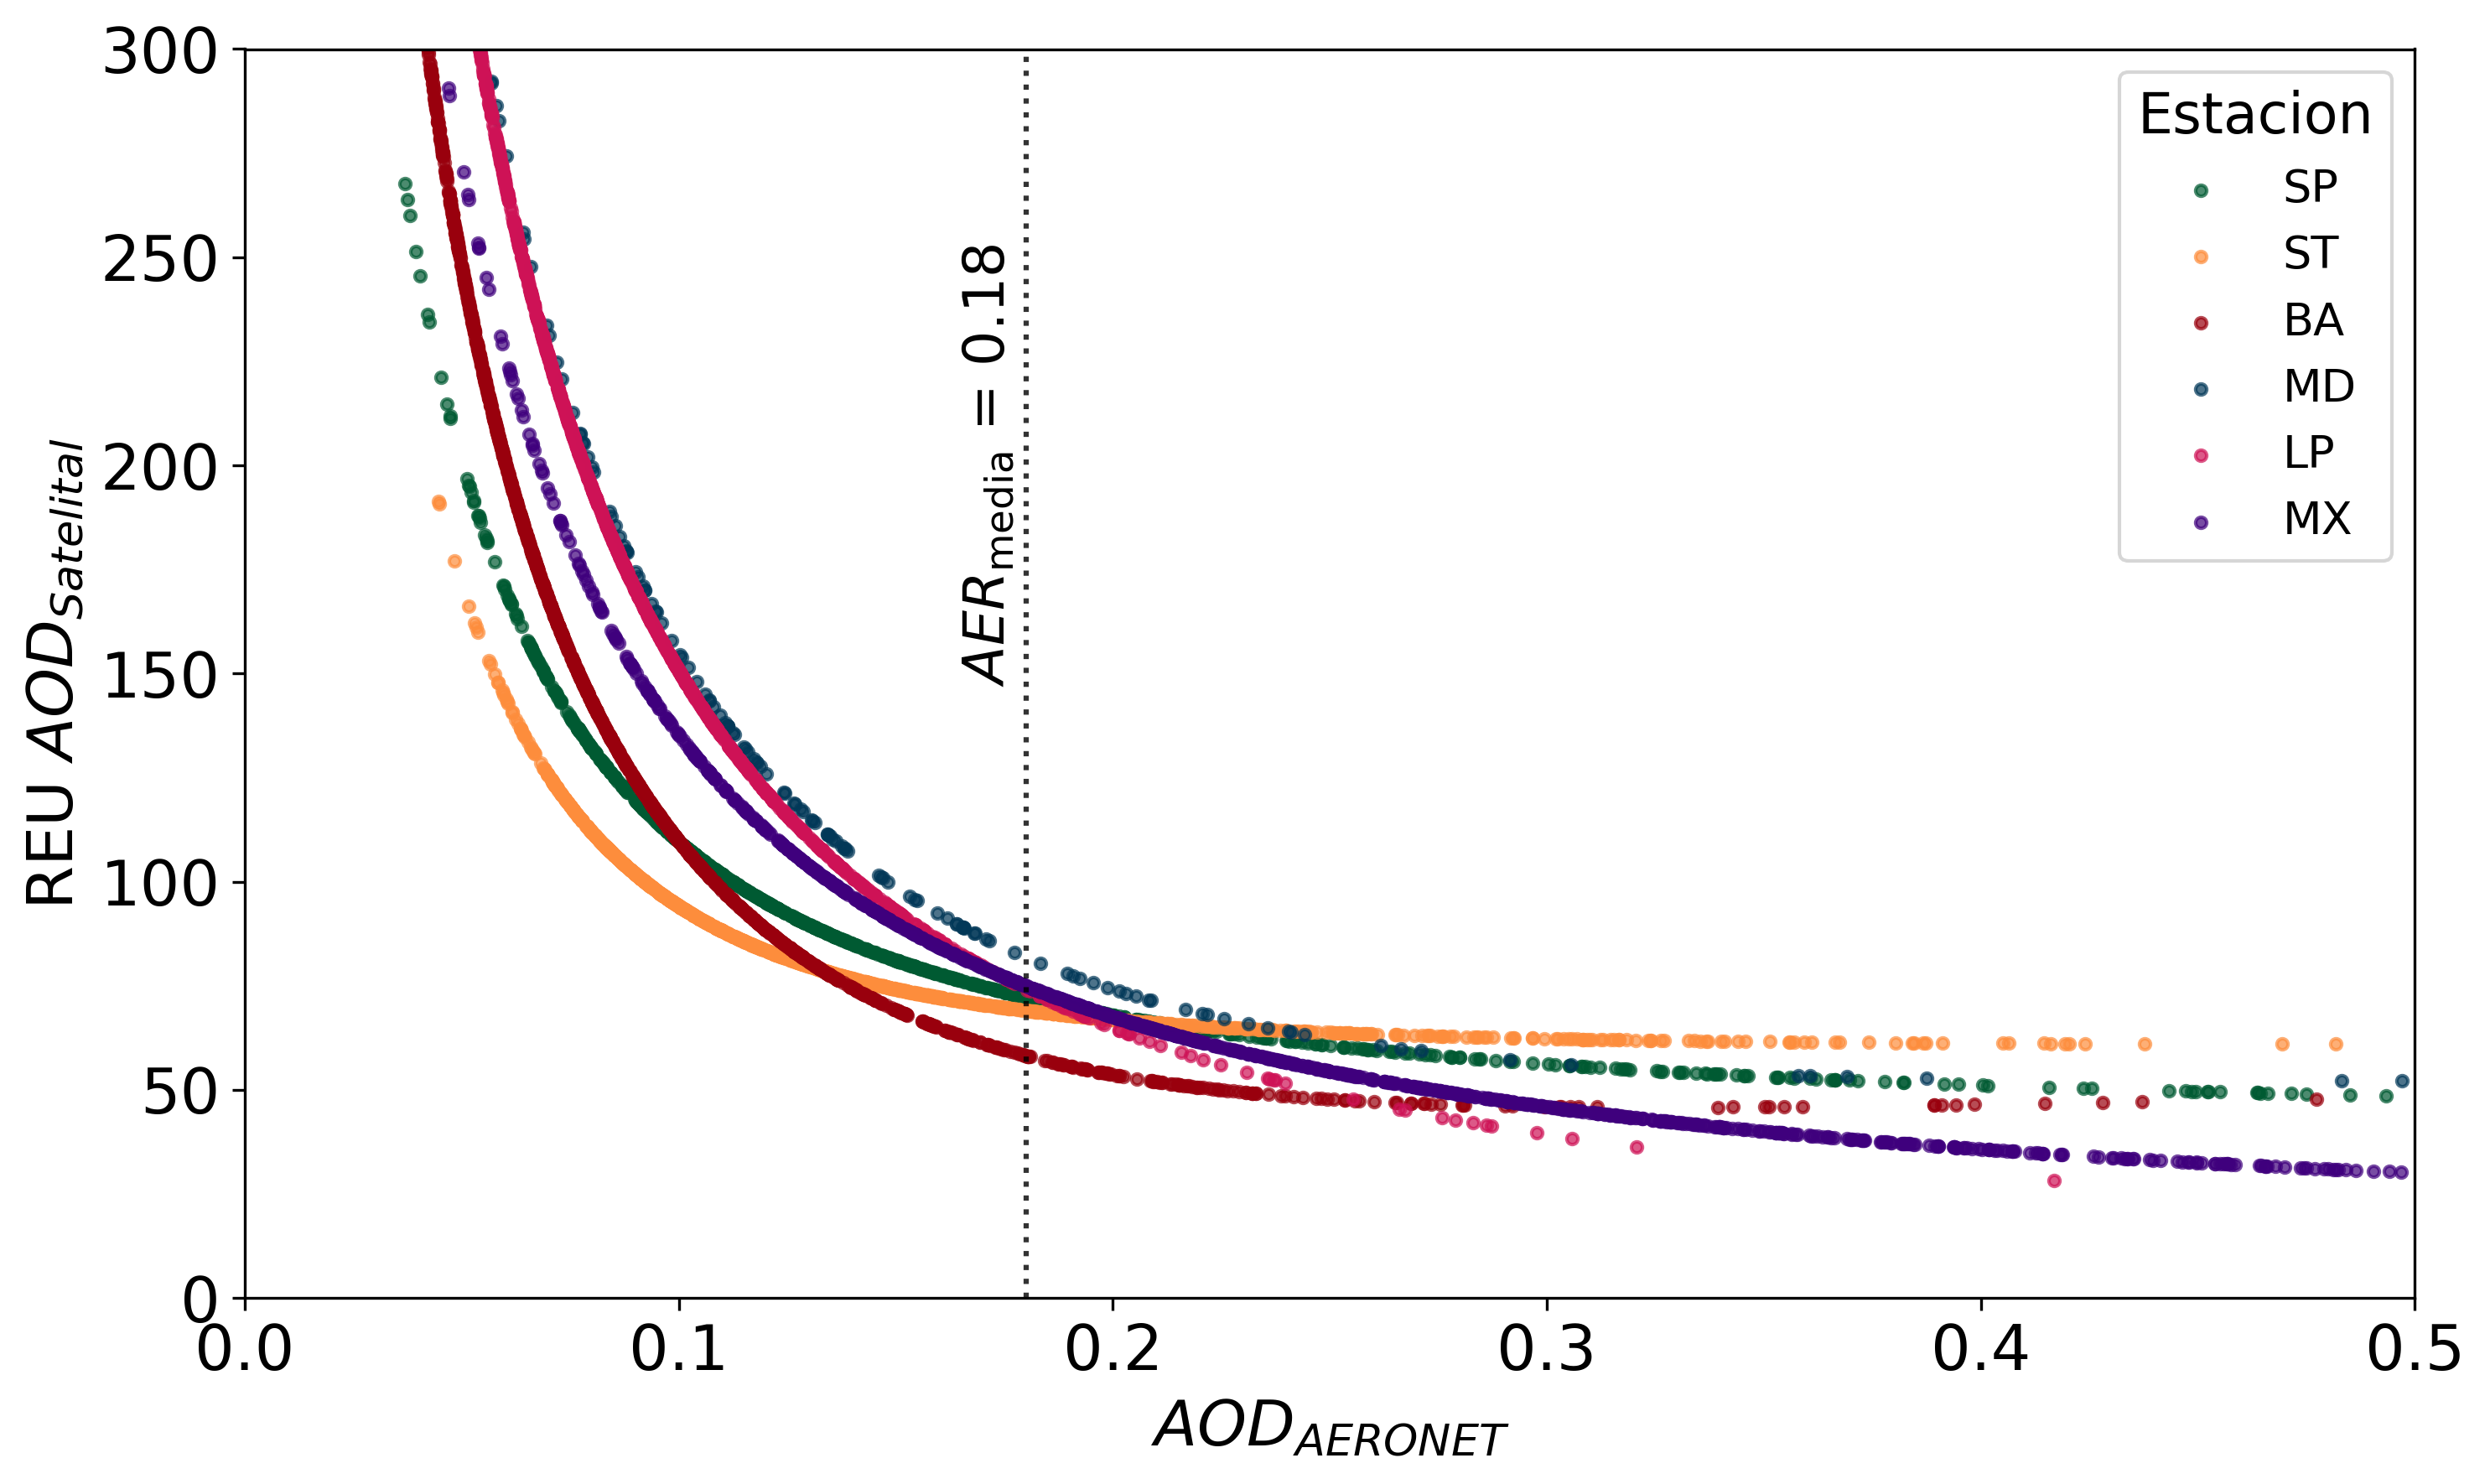

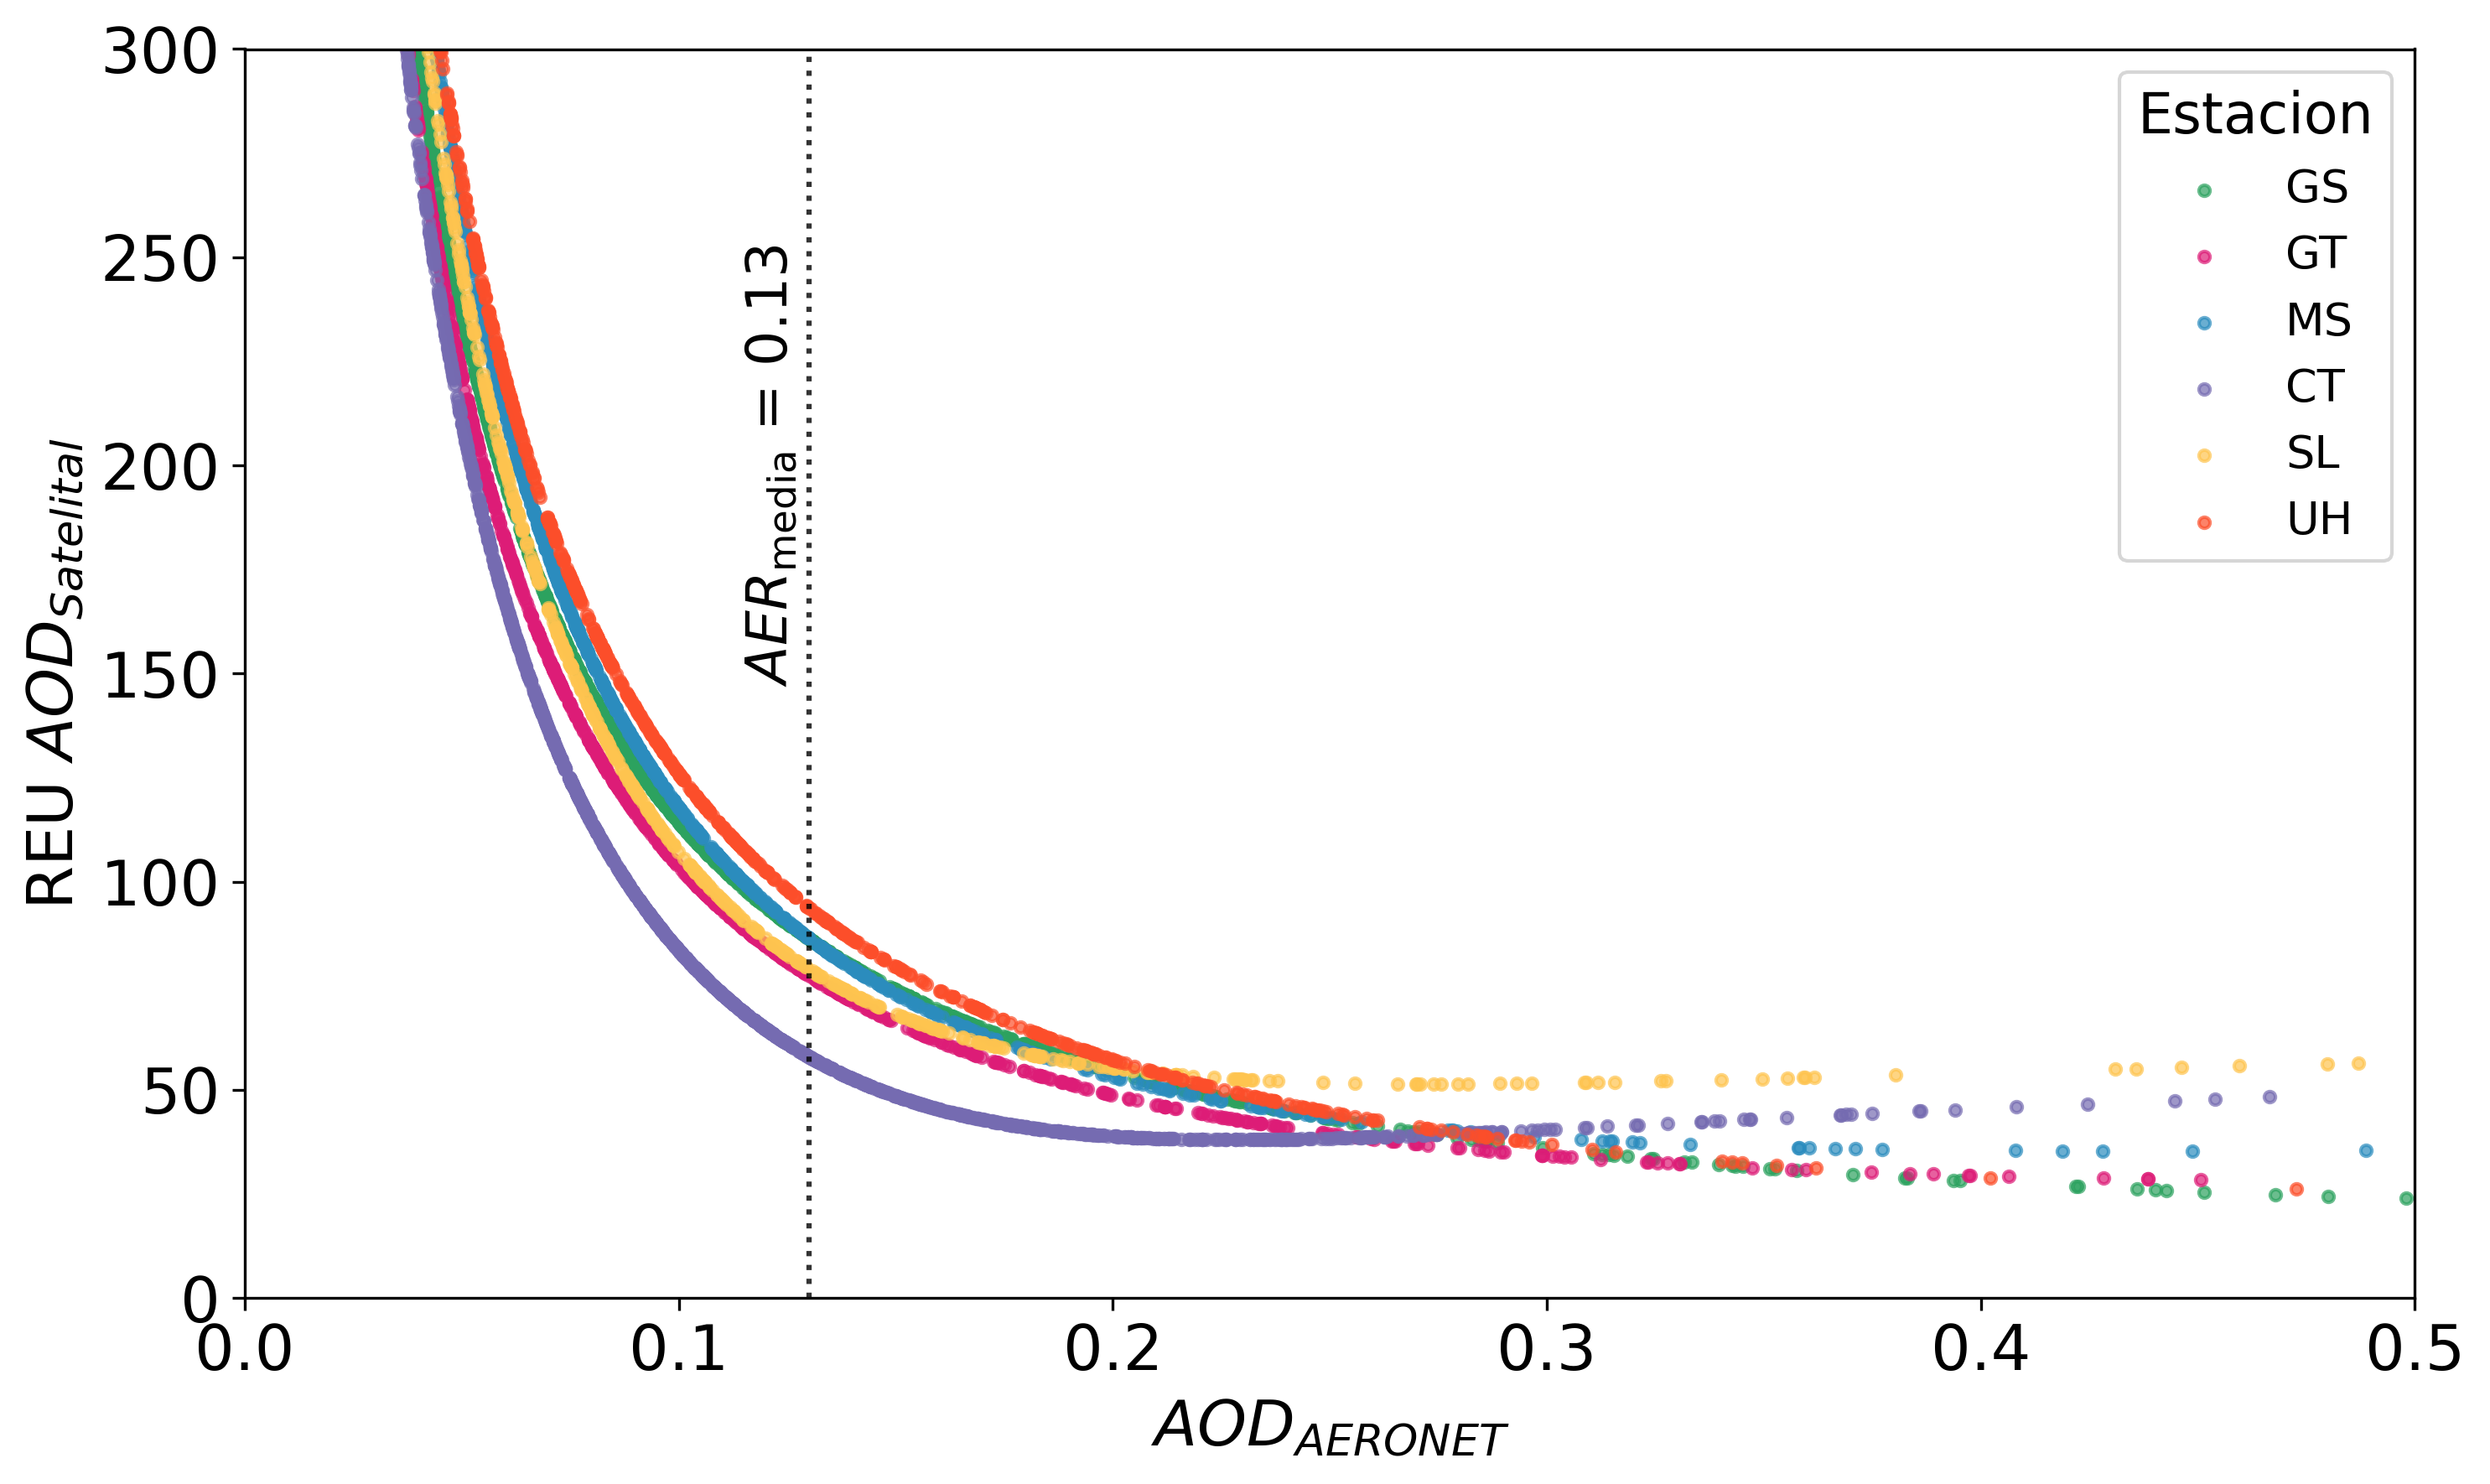

In [132]:
def REU_plot_unico(path, date_format, color_maiac, resolucion_espaciotemporal):
    '''
    Esta función genera un solo gráfico con todos los puntos REU vs Referencia
    para todas las estaciones.

    - path: carpeta con los CSVs
    - date_format: formato de fecha en la columna 'date'
    - color_maiac: lista de colores para diferenciar las estaciones
    '''
    plt.figure(figsize=(10, 6), dpi=300)
#     listas_medias = [0.18,0.16,0.11,0.2,0.08,0.29]
    listas_medias = [0.19,0.16,0.11,0.15,0.06,0.29]
    all_labels = []

    for p, files in enumerate(os.listdir(path)):
        data = pd.read_csv(os.path.join(path, files))
        data["Timestamp"] = data["date"].apply(lambda x: datetime.strptime(x, date_format))
        data.set_index('Timestamp', inplace=True)

        df_REUxy = REU_list(
            DF=data,
            Pollutant='AOD_550_AER_mean',
            Units=["AOD_550_maiac_mean"],
            Lambda=1,
            u_xi=0.0
        )

        x = df_REUxy["AOD_550_AER_mean"]
        y = df_REUxy["REUx_AOD_550_maiac_mean"]
        station_name = files[2:4]  # o poné el nombre como desees

        # Agregar scatter para esta estación
        plt.scatter(x, y, s=10, color=color_maiac[p], label=station_name, alpha=0.7)

        # Línea horizontal indicando REU en valor medio
#         x_intersec = listas_medias[p]
#         idx = (x - x_intersec).abs().idxmin()
#         y_intersec = y.loc[idx]
#         plt.hlines(y=y_intersec, xmin=0, xmax=1.2, color=color_maiac[p], linestyle='--', alpha=0.5)
    plt.vlines(x=0.18, ymin=0, ymax=300, color='black', linewidth=1.5, linestyle=':', alpha=0.8)
    plt.xlabel(r'$AOD_{AERONET}$',size=18)
    plt.ylabel(r'REU $AOD_{Satelital}$',size=18)
    plt.text(0.165, 200, f"$AER_{{\\mathrm{{media}}}}$ = 0.18", rotation=90, va='center', size=16)

#     plt.title(resolucion_espaciotemporal, fontsize=14, fontweight='bold')
    plt.xlim(0, 0.5)
    plt.xticks(np.arange(0, 0.57, 0.1)) 
    plt.ylim(0, 300)
    plt.grid(False)
    plt.tick_params(axis='both', labelsize=18)
#     plt.legend(fontsize=30)
#     plt.legend(title="Station", loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.legend(title="Estacion", loc='upper right', bbox_to_anchor=(1,1), fontsize=13, title_fontsize=16) # Cambia bbox_to_anchor según necesites
    plt.tight_layout()
    plt.show()

    
dir = "D:/Josefina/paper_git/paper_maiac/datasets/V03/processed/merge_AER-MAIAC/Latam_C61/dia/1km/60mins"
resolucion_espaciotemporal = "1KM-60MIN-TOT"
REU_plot_unico(path=dir,date_format='%d/%m/%Y',color_maiac = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"],resolucion_espaciotemporal=resolucion_espaciotemporal)



def REU_plot_unico(path, date_format, color_maiac, resolucion_espaciotemporal):
    '''
    Esta función genera un solo gráfico con todos los puntos REU vs Referencia
    para todas las estaciones.

    - path: carpeta con los CSVs
    - date_format: formato de fecha en la columna 'date'
    - color_maiac: lista de colores para diferenciar las estaciones
    '''
    plt.figure(figsize=(10, 6), dpi=300)
#     listas_medias = [0.18,0.16,0.11,0.2,0.08,0.29]
    listas_medias = [0.12,0.13,0.13,0.11,0.14,0.15]
    all_labels = []

    for p, files in enumerate(os.listdir(path)):
        data = pd.read_csv(os.path.join(path, files))
        data["Timestamp"] = data["date"].apply(lambda x: datetime.strptime(x, date_format))
        data.set_index('Timestamp', inplace=True)

        df_REUxy = REU_list(
            DF=data,
            Pollutant='AOD_550_AER_mean',
            Units=["AOD_550_maiac_mean"],
            Lambda=1,
            u_xi=0.0
        )

        x = df_REUxy["AOD_550_AER_mean"]
        y = df_REUxy["REUx_AOD_550_maiac_mean"]
        station_name = files[2:4]  # o poné el nombre como desees

        # Agregar scatter para esta estación
        plt.scatter(x, y, s=10, color=color_maiac[p], label=station_name, alpha=0.7)

        # Línea horizontal indicando REU en valor medio
#         x_intersec = listas_medias[p]
#         idx = (x - x_intersec).abs().idxmin()
#         y_intersec = y.loc[idx]
#         plt.hlines(y=y_intersec, xmin=0, xmax=1.2, color=color_maiac[p], linestyle='--', alpha=0.5)
    plt.vlines(x=0.13, ymin=0, ymax=300, color='black', linewidth=1.5, linestyle=':', alpha=0.8)
    plt.text(0.115, 200, f"$AER_{{\\mathrm{{media}}}}$ = 0.13", rotation=90, va='center', size=16)

    plt.xlabel(r'$AOD_{AERONET}$',size=18)
    plt.ylabel(r'REU $AOD_{Satelital}$',size=18)
#     plt.title(resolucion_espaciotemporal, fontsize=14, fontweight='bold')
    plt.xlim(0, 0.5)
    plt.xticks(np.arange(0, 0.57, 0.1)) 
    plt.ylim(0, 300)
    plt.grid(False)
    plt.tick_params(axis='both', labelsize=18)
#     plt.legend(fontsize=30)
#     plt.legend(title="Station", loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.legend(title="Estacion", loc='upper right', bbox_to_anchor=(1,1), fontsize=13, title_fontsize=16) # Cambia bbox_to_anchor según necesites
    plt.tight_layout()
    plt.show()

dir = "D:/Josefina/paper_git/paper_maiac/datasets/V03/processed/merge_AER-MAIAC/USA_C61/dia/1km/60mins"
resolucion_espaciotemporal = "1KM-60MIN-TOT"
REU_plot_unico(path=dir,date_format='%Y-%m-%d',color_maiac =["#2ca25f", "#dd1c77", "#2b8cbe", "#756bb1", "#fec44f", "#fc4e2a"],resolucion_espaciotemporal=resolucion_espaciotemporal)

